# Imports

In [3]:
#%matplotlib qt

from IPython import get_ipython
ipython = get_ipython()
ipython.magic("gui qt5") 

import napari
from PIL import Image

import numpy as np
import cv2

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors as colors
import matplotlib.path as mpltpath

import time

import pickle as pkl
from os.path import sep
#import h5py

# import Cell
# import pixels_in_roi
# import diff_gauss
# import scatter_channels
# import hist_channels
# import m_dist

from skimage.measure import profile_line

# Load images

## Raw images

In [94]:
t0 = time.time()
folder = 'G:{0}Shared drives{0}as_share{0}HCR{0}HCR 3.11{0}S3{0}S3_raw_tiff_images'.format(sep)
plane_nos = range(1, 11)

# base_filename2 = 'S1_dapi_546_488_647_s2z'
base_filename = 'S3_z'
n = len(plane_nos)
print('Number of planes: {0}'.format(n))

# Create 4D array to store images
img = Image.open('{0}{1}{2}{3}_ChS1-T3_ORG.tif'.format(folder, sep, base_filename, str(plane_nos[0]).zfill(2)))

h = img.height
w = img.width

Number of planes: 10


In [4]:
# %% Load images
t0 = time.time()
folder = 'G:{0}Shared drives{0}as_share{0}HCR{0}HCR 3.11{0}S3{0}S3_raw_tiff_images'.format(sep)
plane_nos = range(1, 11)

# base_filename2 = 'S1_dapi_546_488_647_s2z'
base_filename = 'S3_z'
n = len(plane_nos)
print('Number of planes: {0}'.format(n))

# Create 4D array to store images
img = Image.open('{0}{1}{2}{3}_ChS1-T3_ORG.tif'.format(folder, sep, base_filename, str(plane_nos[0]).zfill(2)))

h = img.height
w = img.width
im_array_vip = np.zeros([n, h, w])
im_array_npy2r = np.zeros([n, h, w])
im_array_car4 = np.zeros([n, h, w])
im_array_tac2 = np.zeros([n, h, w])
im_array_dapi = np.zeros([n, h, w])

print('Size of image in pixels: {0} X {1} X {2}'.format(n, h, w))

for i in range(n):
    print('Loading image {0}, {1} seconds'.format(i + 1, np.round(time.time() - t0)))
    p = plane_nos[i]
    img_vip = Image.open('{0}{1}{2}{3}_ChS1-T3_ORG.tif'.format(folder, sep, base_filename, str(p).zfill(2)))
    img_npy2r = Image.open('{0}{1}{2}{3}_ChS2-T3_ORG.tif'.format(folder, sep, base_filename, str(p).zfill(2)))
    img_car4 = Image.open('{0}{1}{2}{3}_ChS2-T2_ORG.tif'.format(folder, sep, base_filename, str(p).zfill(2)))
    img_tac2 = Image.open('{0}{1}{2}{3}_ChS2-T1_ORG.tif'.format(folder, sep, base_filename, str(p).zfill(2)))
    img_dapi = Image.open('{0}{1}{2}{3}_ChS1-T1_ORG.tif'.format(folder, sep, base_filename, str(p).zfill(2)))

    try:
        im_array_vip[i, :, :] = np.array(img_vip)
        im_array_npy2r[i, :, :] = np.array(img_npy2r)
        im_array_car4[i, :, :] = np.array(img_car4)
        im_array_tac2[i, :, :] = np.array(img_tac2)
        im_array_dapi[i, :, :] = np.array(img_dapi)
    except:
        print('Plane {0} could not be loaded'.format(p))
        print('Size of plane {0} in pixels: {0} X {1}'.format(img.height, img.width))
        im_array_gad1 = np.delete(im_array_gad1, i, axis = 0)
        im_array_vip = np.delete(im_array_vip, i, axis = 0)
        im_array_sst = np.delete(im_array_sst, i, axis = 0)
        im_array_ndnf = np.delete(im_array_ndnf, i, axis = 0)
        plane_nos.remove(p)
        i -= 1
        n = len(plane_nos)
        continue

del img_vip
del img_npy2r
del img_car4
del img_tac2
del img_dapi

Number of planes: 10
Size of image in pixels: 10 X 4709 X 8396
Loading image 1, 0.0 seconds
Loading image 2, 4.0 seconds
Loading image 3, 8.0 seconds
Loading image 4, 12.0 seconds
Loading image 5, 16.0 seconds
Loading image 6, 20.0 seconds
Loading image 7, 24.0 seconds
Loading image 8, 28.0 seconds
Loading image 9, 33.0 seconds
Loading image 10, 39.0 seconds


## Gaussian blurred images

In [5]:
# %% Load images
t0 = time.time()
folder = 'G:{0}Shared drives{0}as_share{0}HCR{0}HCR 3.11{0}S3{0}S3_blurred_tiff_images'.format(sep)
plane_nos = range(1, 11)

# base_filename2 = 'S1_dapi_546_488_647_s2z'
base_filename = 'S3_z'
n = len(plane_nos)
print('Number of planes: {0}'.format(n))

# Create 4D array to store images
img = Image.open('{0}{1}{2}{3}_Vip_5px_gauss_blur.tif'.format(folder, sep, base_filename, str(plane_nos[0]).zfill(2)))

h = img.height
w = img.width
im_array_vip_blur = np.zeros([n, h, w])
# im_array_vip = np.zeros([n, h, w])
# im_array_sst = np.zeros([n, h, w])
# im_array_ndnf = np.zeros([n, h, w])
# im_array_dapi = np.zeros([n, h, w])

print('Size of image in pixels: {0} X {1} X {2}'.format(n, h, w))

for i in range(n):
    print('Loading image {0}, {1} seconds'.format(i + 1, np.round(time.time() - t0)))
    p = plane_nos[i]
    img_vip = Image.open('{0}{1}{2}{3}_Vip_5px_gauss_blur.tif'.format(folder, sep, base_filename, str(p).zfill(2)))
#     img_vip = Image.open('{0}{1}{2}{3}_ChS2-T3_ORG.tif'.format(folder, sep, base_filename, str(p).zfill(2)))
#     img_sst = Image.open('{0}{1}{2}{3}_ChS2-T2_ORG.tif'.format(folder, sep, base_filename, str(p).zfill(2)))
#     img_ndnf = Image.open('{0}{1}{2}{3}_ChS2-T1_ORG.tif'.format(folder, sep, base_filename, str(p).zfill(2)))
#     img_dapi = Image.open('{0}{1}{2}{3}_ChS1-T1_ORG.tif'.format(folder, sep, base_filename, str(p).zfill(2)))

    try:
        im_array_vip_blur[i, :, :] = np.array(img_vip)
#         im_array_vip[i, :, :] = np.array(img_vip)
#         im_array_sst[i, :, :] = np.array(img_sst)
#         im_array_ndnf[i, :, :] = np.array(img_ndnf)
#         im_array_dapi[i, :, :] = np.array(img_dapi)
    except:
        print('Plane {0} could not be loaded'.format(p))
        print('Size of plane {0} in pixels: {0} X {1}'.format(img.height, img.width))
        im_array_gad1 = np.delete(im_array_gad1, i, axis = 0)
        im_array_vip = np.delete(im_array_vip, i, axis = 0)
        im_array_sst = np.delete(im_array_sst, i, axis = 0)
        im_array_ndnf = np.delete(im_array_ndnf, i, axis = 0)
        plane_nos.remove(p)
        i -= 1
        n = len(plane_nos)
        continue

del img_vip
# del img_vip
# del img_sst
# del img_ndnf
# del img_dapi

Number of planes: 10
Size of image in pixels: 10 X 4709 X 8396
Loading image 1, 0.0 seconds
Loading image 2, 1.0 seconds
Loading image 3, 1.0 seconds
Loading image 4, 2.0 seconds
Loading image 5, 3.0 seconds
Loading image 6, 3.0 seconds
Loading image 7, 4.0 seconds
Loading image 8, 5.0 seconds
Loading image 9, 5.0 seconds
Loading image 10, 6.0 seconds


## Background subtracted (rolling ball)

In [ ]:
# Background subtracted (using rolling ball background subtraction in Fiji)
print('Ndnf')
im_array_ndnf = np.zeros([n, h, w])
img_file = 'S2_Ndnf_bg_sub2'
img = Image.open('{0}\{1}.tif'.format(folder, img_file))
for i in range(n):
    print('Loading image {0}'.format(i + 1))
    p = plane_nos[i]
    try:
        img.seek(p - 1)
        im_array_ndnf[i, :, :] = np.array(img)
        
    except:
        print('Plane {0} could not be loaded'.format(p))
        print('Size of plane {0} in pixels: {0} X {1}'.format(img.height, img.width))
        im_array_ndnf = np.delete(im_array_ndnf, i, axis = 0)
        plane_nos.remove(p)
        i -= 1
        n = len(plane_nos)
        continue

print('Vip')
im_array_vip = np.zeros([n, h, w])
img_file = 'S2_Vip_bg_sub2'
img = Image.open('{0}\{1}.tif'.format(folder, img_file))
for i in range(n):
    print('Loading image {0}'.format(i + 1))
    p = plane_nos[i]
    try:
        img.seek(p - 1)
        im_array_vip[i, :, :] = np.array(img)
        
    except:
        print('Plane {0} could not be loaded'.format(p))
        print('Size of plane {0} in pixels: {0} X {1}'.format(img.height, img.width))
        im_array_vip = np.delete(im_array_vip, i, axis = 0)
        plane_nos.remove(p)
        i -= 1
        n = len(plane_nos)
        continue
        
        
print('Sst')
im_array_sst = np.zeros([n, h, w])
img_file = 'S2_Sst_bg_sub2'
img = Image.open('{0}\{1}.tif'.format(folder, img_file))
for i in range(n):
    print('Loading image {0}'.format(i + 1))
    p = plane_nos[i]
    try:
        img.seek(p - 1)
        im_array_sst[i, :, :] = np.array(img)
        
    except:
        print('Plane {0} could not be loaded'.format(p))
        print('Size of plane {0} in pixels: {0} X {1}'.format(img.height, img.width))
        im_array_sst = np.delete(im_array_sst, i, axis = 0)
        plane_nos.remove(p)
        i -= 1
        n = len(plane_nos)
        continue    

# Render images in napari GUI

## Raw images

In [3]:
# Full images
t0 = time.time()

viewer = napari.Viewer()
viewer.add_image(im_array_vip, name = 'Vip', colormap = 'cyan', blending = 'additive')
viewer.add_image(im_array_npy2r, name = 'Npy2r', colormap = 'magenta', blending = 'additive')
viewer.add_image(im_array_car4, name = 'Car4', colormap = 'yellow', blending = 'additive')
viewer.add_image(im_array_tac2, name = 'Tac2', colormap = 'green', blending = 'additive')

t1 = time.time() - t0
print('{0} seconds'.format(np.round(t1)))

C:\Users\JRCLUST\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\JRCLUST\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\JRCLUST\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\JRCLUST\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:611: UserWarning: From scipy 0.13

26.0 seconds


## Blurred images

In [8]:
viewer.add_image(im_array_vip_blur, name = 'Vip_blur', colormap = 'magenta', blending = 'additive')

<Image layer 'Vip_blur' at 0x16ae10c8>

## Cell masks

### From one click segmentation

In [94]:
mask_layer = viewer.add_shapes(data = None, name = 'Cell masks')

mask = boundary
mask_layer.add(mask, shape_type = 'polygon', opacity = 0.2, face_color = 'white', edge_color = 'red', edge_width = 3)

# indices = list(Cell.cell_data.keys())
# for cell in indices:
#     if np.mod(cell, 10) == 0:
#         print('Cell {0}'.format(cell))
#     planes = Cell.cell_data[cell]['z_planes']
#     for plane in planes:
#         mask = Cell.cell_data[cell]['masks'][plane]
#         mask = np.concatenate((np.ones([mask.shape[0], 1])*plane, mask), axis = 1)
#         mask_layer.add(mask, shape_type = 'polygon', opacity = 0.2, face_color = 'white', edge_color = 'red', edge_width = 3)

### From manual segmentation

In [103]:
# Cells with high mask variance
var_thresh = 600
indices = np.where(np.logical_or(var_masks[:, 0] > var_thresh, var_masks[:, 1] > var_thresh))[0] + 1
print(indices)

[18 20 24 28 30 35 37 45 48]


In [5]:
mask_layer2 = viewer.add_shapes(name = 'Cell masks individual')

indices = list(Cell.cell_data.keys())
for cell in indices:
    if np.mod(cell, 10) == 0:
        print('Cell {0}'.format(cell))
    planes = Cell.cell_data[cell]['z_planes']
    for plane in planes:
        mask = Cell.cell_data[cell]['masks'][plane]
        mask = np.concatenate((np.ones([mask.shape[0], 1])*plane, mask), axis = 1)
        mask_layer2.add(mask, shape_type = 'polygon', opacity = 0.4, face_color = 'white', edge_color = 'yellow', edge_width = 4)

Cell 10
Cell 20
Cell 30
Cell 40
Cell 50
Cell 60
Cell 70
Cell 80
Cell 90
Cell 100
Cell 110
Cell 120
Cell 130


## Lipofuscin ROIs (annotated)

In [80]:
n_rois = len(l_rois)
print('{0} rois found'.format(n_rois))
viewer.add_shapes(l_rois, name = 'Lipofuscin ROIs',
                   shape_type = 'polygon', opacity = 1, face_color = 'white', 
                   edge_color = 'blue', edge_width = 3)

11 rois found


<Shapes layer 'Lipofuscin ROIs [1]' at 0x1ce6a65db88>

## Filtered images

In [ ]:
viewer.add_image(data = im_diff_npy2r, name = 'Diff npy2r', colormap = 'magenta', blending = 'additive')
viewer.add_image(data = im_diff_tac2, name = 'Diff Tac2', colormap = 'green', blending = 'additive')
viewer.add_image(data = im_diff_vip, name = 'Diff Vip', colormap = 'yellow', blending = 'additive')
viewer.add_image(data = im_diff_car4, name = 'Diff Car4', colormap = 'cyan', blending = 'additive')

## Binarized images

In [109]:
viewer.add_image(data = im_diff_npy2r2, name = 'Diff npy2r', colormap = 'magenta', blending = 'additive')
viewer.add_image(data = im_diff_tac22, name = 'Diff Tac2', colormap = 'green', blending = 'additive')
viewer.add_image(data = im_diff_vip2, name = 'Diff Vip', colormap = 'yellow', blending = 'additive')
viewer.add_image(data = im_diff_car42, name = 'Diff Car4', colormap = 'cyan', blending = 'additive')

C:\Users\JRCLUST\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\JRCLUST\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\JRCLUST\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\JRCLUST\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:611: UserWarning: From scipy 0.13

<Image layer 'Diff Car4' at 0x1d86f229188>

## Detected lipofuscin pixels

In [70]:
viewer.add_image(data = im_array_lipo, name = 'Detected lipofuscin', colormap = 'gray', blending = 'additive')

C:\Users\JRCLUST\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


<Image layer 'Detected lipofuscin' at 0x1d832df15c8>

## Cell masks after removing lipofuscin (check)

In [52]:
im_array_cells = np.zeros(im_array_gad1.shape)


indices = list(Cell.cell_data.keys())
for cell in indices:
    if np.mod(cell, 10) == 0:
        print('Cell {0}'.format(cell))
    planes = Cell.cell_data[cell]['z_planes']
    for plane in planes:
        mask = cell_pixels_no_lipo[cell][plane]
        mask = np.concatenate((np.ones([1, mask.shape[1]])*plane, mask))
        mask = mask.astype(int)
        im_array_cells[mask[0, :], mask[1, :], mask[2, :]] = np.ones(mask.shape[1])
        

viewer.add_image(data = im_array_cells, name = 'Cell pixels', colormap = 'blue', blending = 'additive')

Cell 10
Cell 20
Cell 30
Cell 40
Cell 50
Cell 60
Cell 70
Cell 80
Cell 90
Cell 100
Cell 110
Cell 120
Cell 130
Cell 140
Cell 150
Cell 160
Cell 170
Cell 180
Cell 190
Cell 200
Cell 210
Cell 220
Cell 230
Cell 240
Cell 250
Cell 260
Cell 270
Cell 280
Cell 290


<Image layer 'Cell pixels' at 0x138047427c8>

## Cells with significant expression

In [56]:
npy2r_mask_layer = viewer.add_shapes(name = 'npy2r+ cells')

indices = list(Cell.cell_data.keys())
for cell in indices:
    
    if pv_npy2r3[cell - 1] < 0.05:
        planes = Cell.cell_data[cell]['z_planes']
        for plane in planes:
            mask = Cell.cell_data[cell]['masks'][plane]
            mask = np.concatenate((np.ones([mask.shape[0], 1])*plane, mask), axis = 1)
            npy2r_mask_layer.add(mask, shape_type = 'polygon', opacity = 0.2, face_color = 'white', edge_color = 'magenta', edge_width = 3)

In [58]:
car4_mask_layer = viewer.add_shapes(name = 'car4+ cells')

indices = list(Cell.cell_data.keys())
for cell in indices:
    
    if pv_car43[cell - 1] < 0.05:
        planes = Cell.cell_data[cell]['z_planes']
        for plane in planes:
            mask = Cell.cell_data[cell]['masks'][plane]
            mask = np.concatenate((np.ones([mask.shape[0], 1])*plane, mask), axis = 1)
            car4_mask_layer.add(mask, shape_type = 'polygon', opacity = 0.2, face_color = 'white', edge_color = 'yellow', edge_width = 3)

In [57]:
tac2_mask_layer = viewer.add_shapes(name = 'tac2+ cells')

indices = list(Cell.cell_data.keys())
for cell in indices:
    
    if pv_tac2[cell - 1] < 0.05:
        planes = Cell.cell_data[cell]['z_planes']
        for plane in planes:
            mask = Cell.cell_data[cell]['masks'][plane]
            mask = np.concatenate((np.ones([mask.shape[0], 1])*plane, mask), axis = 1)
            tac2_mask_layer.add(mask, shape_type = 'polygon', opacity = 0.2, face_color = 'white', edge_color = 'green', edge_width = 3)

# Cell segmentation

## Load existing masks

In [4]:
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11'
save_file= 'S3_data.pkl'
try:
    with open('{0}\{1}'.format(save_loc, save_file), 'rb') as f:
        Cell.cell_data = pkl.load(f)
        indices = list(Cell.cell_data.keys())
        if not np.max(indices) == len(indices):
            print('Re-numbering cells to be consecutive')
            Cell.cell_data_temp = {}
            for i in range(len(indices)):
                Cell.cell_data_temp[i + 1] = Cell.cell_data[indices[i]]
                Cell.cell_data_temp[i + 1]['cell_id'] = i + 1
            Cell.cell_data = Cell.cell_data_temp 
            with open('{0}\{1}'.format(save_loc, save_file), 'wb') as f:
                pkl.dump(Cell.cell_data, f)
            Cell.n_cells = i + 1
        else:
            Cell.n_cells = len(indices)
    print('{0} cells found'.format(Cell.n_cells))
except:
    print('No data found')

135 cells found


## Get pixels in cell masks

In [11]:
t0 = time.time()
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11'
#save_file = 'S2_cell_pixels.pkl'
save_file = 'S3_mask_vertices.pkl'

try:
    with open('{0}\\{1}'.format(save_loc, save_file), 'rb') as f:
        mask_vertices = pkl.load(f)
        cells = mask_vertices.keys()
        x = 0
        all_cell_pixels = np.zeros([1, 3])
        for cell in cells:
            data = Cell.cell_data[cell]
            planes = data['z_planes']
            for plane in planes:
                xvals = np.reshape(mask_vertices[cell][plane][0], [-1, 1])
                yvals = np.reshape(mask_vertices[cell][plane][1], [-1, 1])
                zvals = np.ones([len(xvals), 1])*plane
                coords = np.concatenate((zvals, xvals, yvals), axis = 1)
                all_cell_pixels = np.concatenate((all_cell_pixels, coords), axis = 0)
        
        all_cell_pixels = all_cell_pixels[1:, :].astype(int)
            
        print('Data loaded')
        
except IOError:
    print('No saved data found, calculating mask pixels')
    xv = range(w)
    yv = range(h)
    coord_array = np.array(np.meshgrid(xv, yv))

    points = np.zeros([h*w, 2])
    p = 0
    for i in range(h):
        for j in range(w):
            points[p, 1] = coord_array[0, i, j]
            points[p, 0] = coord_array[1, i, j]
            p += 1

    no_cells = len(Cell.cell_data.keys())
    mask_vertices = {}
    for cell in range(no_cells):
        if np.mod(cell, 2) == 0:
            print('Cell {0}: {1} seconds'.format(cell, np.round(time.time() - t0)))
        cell_no = cell + 1
        mask_vertices[cell_no] = {}
        cell_dict = Cell.cell_data[cell_no]
        masks = cell_dict['masks']
        z_planes = cell_dict['z_planes']
        for plane in z_planes:

            vertices = masks[plane]
            path = mpltpath.Path(vertices)
            mask = path.contains_points(points)
            mask = np.reshape(mask, [h, w])
            mask_vertices[cell_no][plane] = np.where(mask)
    
with open('{0}\\{1}'.format(save_loc, save_file), 'wb') as f:
    pkl.dump(mask_vertices, f)

Data loaded


In [9]:
with open('{0}\\{1}'.format(save_loc, save_file), 'wb') as f:
    pkl.dump(mask_vertices, f)

## Semi-manual segmentation using Gad1 channel

### Data structure to store cell masks

In [9]:
class Cell:
    n_cells = 1
    cell_data = {}
    
    def __init__(self, cell_no):
        
        self.cell_no = cell_no
        self.z_planes = []
        self.no_planes = 0
        self.masks = {}
        self.c_vals = np.zeros(1)
        print('Cell #{0} created'.format(Cell.n_cells))
        
    def add_mask(self, z_plane, mask):
        self.z_planes.append(z_plane)
        self.no_planes += 1
        self.masks[z_plane] = mask
            
    def save_cell(self):
        Cell.cell_data[self.cell_no] = {'cell_id': self.cell_no,
                                 'z_planes': self.z_planes,
                                 'masks': self.masks,
                                 'no_planes': self.no_planes,
                                 'c_vals':self.c_vals}

### Napari keybindings

In [11]:
mask_layer = viewer.add_shapes(data = None, shape_type = 'polygon', opacity = 0.2, face_color = 'white', edge_color = 'red', edge_width = 3)
point_layer = viewer.add_points(data = None)
save_loc = 'G:{0}Shared drives{0}as_share{0}HCR{0}HCR 3.11'.format(sep)
save_file = 'S3_data.pkl'

@viewer.bind_key('n', overwrite = True)
def new_cell(viewer):
    global cell1 
    cell1 = Cell(Cell.n_cells)
    print(Cell.n_cells)
    Cell.n_cells += 1
    
    
@viewer.bind_key('d', overwrite = True)
def get_mask(viewer):
    center = point_layer.data[-1, 1:] # Last drawn point
    z_plane = point_layer.data[-1, 0].astype(int)
    image = im_array_vip_blur[z_plane, :, :]
    cell_radius_px = 70

    boundary = disc_roi(image, center, z_plane, cell_radius_px)

    mask_layer.add(boundary, shape_type= 'polygon')
    
    
@viewer.bind_key('m', overwrite = True)
def add_mask(viewer):
    
    z_plane = mask_layer.data[-1][0, 0]
    mask = mask_layer.data[-1][:, 1:]
    cell1.add_mask(z_plane, mask)
    
@viewer.bind_key('y', overwrite = True)
def del_cell(viewer):
    
    mask_no = mask_layer2.selected_data[0]
    cell = mask_cell_nos[mask_no]
    z_plane = mask_layer2.coordinates[0]
    
    Cell.cell_data[cell]['masks'][z_plane] = mask_layer2.data[mask_no][:, 1:]
    with open('{0}\{1}'.format(save_loc, save_file), 'wb') as f:
                pkl.dump(Cell.cell_data, f)
    
    mask = Cell.cell_data[cell]['masks'][z_plane]
    n_vertices = mask.shape[0]
    mask = np.concatenate([np.ones([n_vertices, 1])*z_plane, mask], axis = 1)
    mask_layer2.add(mask, shape_type = 'polygon', opacity = 0.4, 
                    face_color = 'white', edge_color = 'yellow', edge_width = 5)
    
    
@viewer.bind_key('k', overwrite = True)
def save_cell(viewer):
    cell1.save_cell()
    
@viewer.bind_key('Control-s', overwrite = True)
def save_all(viewer):
    with open('{0}\{1}'.format(save_loc, save_file), 'wb') as f:
                pkl.dump(Cell.cell_data, f)

### One click segmentation

#### View saved masks

In [25]:
Cell.n_cells

139

In [72]:
with open('{0}\{1}'.format(save_loc, save_file), 'wb') as f:
        pkl.dump(Cell.cell_data, f)

In [23]:
# Check number of masks per cell, and variance of mask centers
indices = list(Cell.cell_data.keys())
n_planes = np.zeros(len(indices)).astype(int)
var_masks = np.zeros([len(indices), 2])

if not np.max(indices) == len(indices):
    print('{0} cells not recorded'.format(np.max(indices) - len(indices)))
    print('Re-numbering cells to be consecutive')
    Cell.cell_data_temp = {}
    for i in range(len(indices)):
        Cell.cell_data_temp[i + 1] = Cell.cell_data[indices[i]]
        Cell.cell_data_temp[i + 1]['cell_id'] = i + 1
    Cell.cell_data = Cell.cell_data_temp 
    with open('{0}\{1}'.format(save_loc, save_file), 'wb') as f:
        pkl.dump(Cell.cell_data, f)
        
Cell.n_cells = len(indices)
        
for i in range(len(indices)):
    z_planes = Cell.cell_data[i + 1]['z_planes']
    n_planes[i] = len(z_planes)
    masks = Cell.cell_data[i + 1]['masks']
    centers = np.zeros([n_planes[i], 2])
    for j in range(n_planes[i]):
        centers[j, 0] = np.mean(masks[z_planes[j]][:, 0])
        centers[j, 1] = np.mean(masks[z_planes[j]][:, 1])
    var_masks[i, 0] = np.var(centers[:, 0])
    var_masks[i, 1] = np.var(centers[:, 1])
    
    

In [24]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = [15, 5])
ax[0].plot(n_planes)
ax[0].set_xlabel('Cell number')
ax[0].set_ylabel('Number of masks')
ax[1].plot(var_masks[:, 0], label = 'y_values')
ax[1].plot(var_masks[:, 1], label = 'x_values')
ax[1].set_ylabel('Variance of centers')
ax[1].plot(range(len(indices)), np.ones(len(indices))*8, '--', color = 'k')
ax[1].legend()

In [147]:
plt.close('all')

#### Functions

In [12]:
def disc_roi(image, center, z_plane, cell_radius_px, n_theta = 30, thresh = 0.5):
    
    full_radius = round(1.3*cell_radius_px)
    thetas = np.linspace(0, 2*np.pi, n_theta)
    [x, y] = center
    
    
    line_profiles = np.zeros([full_radius, n_theta])
    
    r_threshold_cross = np.zeros(n_theta)
    
    for t in range(n_theta):
        theta = thetas[t]
        f = profile_line(image, (x, y), (x + full_radius*np.cos(theta), y + full_radius*np.sin(theta)))
        r_threshold_cross[t] = find_first_cross(f, thresh)
        line_profiles[:, t] = -1*np.abs(np.array(range(full_radius)) - r_threshold_cross[t]) + full_radius;
        
    #path = find_path(line_profiles)
   
    #boundary = np.zeros([2, n_theta])
    #boundary[0, :] = x + np.multiply(path, np.cos(thetas))
    #boundary[1, :] = y + np.multiply(path, np.sin(thetas))
    #boundary = boundary.astype(int)
    
    angular_dist = np.argmax(line_profiles, axis = 0)
    boundary = np.zeros([n_theta, 3])
    boundary[:, 0] = np.ones(n_theta)*z_plane
    boundary[:, 1] = x + np.multiply(angular_dist, np.cos(thetas))
    boundary[:, 2] = y + np.multiply(angular_dist, np.sin(thetas))
    
    
    
    return boundary

def find_first_cross(line_profile, thresh):
    
    # Assumes line profile goes from inside cell to outside
    max_val = np.max(line_profile)
    max_idx = np.argmax(line_profile)
    min_val_out = np.min(line_profile[max_idx:]) # Minimum intensity outside cell
    
    thresh_val = min_val_out + thresh*(max_val - min_val_out)
    r_cross = max_idx + np.where(line_profile[max_idx:] < thresh_val)[0][0]
    
    return r_cross

def find_path(line_profiles):
    
    # line_profiles should be of shape radius X n_theta
    radius = line_profiles.shape[0]
    n_theta = line_profiles.shape[1]
    
    pointer = np.zeros([radius, n_theta])
    value = np.zeros([radius, n_theta])
    value[:, 0] = line_profiles[:, 0]
    
    for i in range(1, n_theta):
        for j in range(1, radius - 1):
            
            M = np.max(value[j-1:j+1, i-1])
            ind = np.argmax(value[j-1:j+1, i-1])
            
            value[j, i] = M + line_profiles[j, i]
            pointer[j,i] = j + ind - 1
            
    # Second traverse to minimize boundary effect
    pointer = np.zeros([radius, n_theta])
    value[:, 1] = value[:, -1]
    
    for i in range(1, n_theta):
        for j in range(1, radius - 1):
            
            M = np.max(value[j-1:j+1, i-1])
            ind = np.argmax(value[j-1:j+1, i-1])
            
            value[j, i] = M + line_profiles[j, i]
            pointer[j,i] = j + ind - 1
    
    path = np.zeros(n_theta).astype(int)
    
    M = np.max(value[:, -1])
    ind = np.argmax(value[:, -1])
    path[-1] = ind
    
    for j in np.flip(range(1, n_theta)):
        path[j-1] = pointer[path[j], j]
        
    return path

#### Find intensity profile at a line joining two points

In [77]:
point_layer = viewer.add_points(data = None)

In [85]:
image = im_array_gad1_blur[0, :, :]

[x1, y1] = point_layer.data[0, 1:]
[x2, y2] = point_layer.data[1, 1:]
z = point_layer.data[0, 0]

profile = profile_line(image, (x1, y1), (x2, y2))
n_points = profile.shape
px_dist = np.floor(np.linalg.norm(np.array([x1, y1]) - np.array([x2, y2])))
print('Pixel distance = {0}, number of points in profile = {1}'.format(px_dist, n_points))

print('x1 = {0}, y1 = {1}, x2 = {2}, y2 = {3}'.format(x1, y1, x2, y2))

Pixel distance = 58.0, number of points in profile = (60,)
x1 = 1124.5762199044127, y1 = 10278.852064061517, x2 = 1083.8527461351187, y2 = 10320.211842108456


#### Find point where intensity falls below threshold

In [86]:
thresh = 0.1
line_profile = profile
max_val = np.max(line_profile)
max_idx = np.argmax(line_profile)
min_val_out = np.min(line_profile[max_idx:]) # Minimum intensity outside cell
thresh_val = min_val_out + thresh*(max_val - min_val_out)
r_cross = max_idx + np.where(line_profile[max_idx:] < thresh_val)[0][0]

In [87]:
plt.figure()
plt.plot(line_profile, color = 'k')

xl = np.array(plt.gca().get_xlim())
yl = np.array(plt.gca().get_ylim())
xi = np.linspace(xl[0], xl[1], 10)
yi = np.linspace(yl[0], yl[1], 10)

plt.plot(xi, np.ones(10)*max_val, color = 'r', linestyle = '--')
plt.plot(xi, np.ones(10)*min_val_out, color = 'r', linestyle = '--')
plt.plot(xi, np.ones(10)*thresh_val, color = 'b', linestyle = '--')
plt.plot(np.ones(10)*r_cross, yi, color = 'b', linestyle = '--')

#### Find intensity profile at several angles

In [92]:
center = [x1, y1]
cell_radius_px = 70
n_theta = 30
thresh = 0.2

full_radius = round(1.3*cell_radius_px)
thetas = np.linspace(0, 2*np.pi, n_theta)
[h, w] = image.shape
[x, y] = center


line_profiles = np.zeros([full_radius, n_theta])
line_profiles_mod = np.zeros([full_radius, n_theta])

r_threshold_cross = np.zeros(n_theta)

for t in range(n_theta):
    theta = thetas[t]
    f = profile_line(image, (x, y), (x + full_radius*np.cos(theta), y + full_radius*np.sin(theta)))
    line_profiles[:, t] = f[:full_radius]
    r_threshold_cross[t] = find_first_cross(f, thresh)
    line_profiles_mod[:, t] = -1*np.abs(np.array(range(full_radius)) - r_threshold_cross[t]) + full_radius;
    
plt.figure()
plt.imshow(line_profiles_mod)
plt.xlabel('Theta/4')
plt.ylabel('Distance from center (px)')
plt.title('Pixel intensity')

Text(0.5, 1.0, 'Pixel intensity')

In [67]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax[0].imshow(line_profiles)
ax[1].imshow(line_profiles_mod)

In [93]:
angular_dist = np.argmax(line_profiles_mod, axis = 0)
boundary = np.zeros([n_theta, 3])
boundary[:, 0] = np.ones(n_theta)*z
boundary[:, 1] = x + np.multiply(angular_dist, np.cos(thetas))
boundary[:, 2] = y + np.multiply(angular_dist, np.sin(thetas))

#### Find boundary of cell from intensity profiles

In [39]:
radius = line_profiles.shape[0]
n_theta = line_profiles.shape[1]

pointer = np.zeros([radius, n_theta])
value = np.zeros([radius, n_theta])
value[:, 0] = line_profiles_mod[:, 0]

for i in range(1, n_theta):
    for j in range(1, radius - 1):

        M = np.max(value[j-1:j+1, i-1])
        ind = np.argmax(value[j-1:j+1, i-1])

        value[j, i] = M + line_profiles_mod[j, i]
        pointer[j,i] = j + ind - 1
        
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))
ax[0, 0].imshow(value)
ax[0, 0].set_xlabel('Theta/4')
ax[0, 0].set_ylabel('Distance from center (px)')
ax[0, 0].set_title('Value - first iteration')

ax[0, 1].imshow(pointer)
ax[0, 1].set_xlabel('Theta/4')
ax[0, 1].set_ylabel('Distance from center (px)')
ax[0, 1].set_title('Pointer - first iteration')

# Second traverse to minimize boundary effect
pointer = np.zeros([radius, n_theta])
value[:, 1] = value[:, -1]

for i in range(1, n_theta):
    for j in range(1, radius - 1):

        M = np.max(value[j-1:j+1, i-1])
        ind = np.argmax(value[j-1:j+1, i-1])

        value[j, i] = M + line_profiles[j, i]
        pointer[j,i] = j + ind - 1

ax[1, 0].imshow(value)
ax[1, 0].set_xlabel('Theta/4')
ax[1, 0].set_ylabel('Distance from center (px)')
ax[1, 0].set_title('Value - second iteration')

ax[1, 1].imshow(pointer)
ax[1, 1].set_xlabel('Theta/4')
ax[1, 1].set_ylabel('Distance from center (px)')
ax[1, 1].set_title('Pointer - second iteration')

path = np.zeros(n_theta).astype(int)
    
M = np.max(value[:, -1])
ind = np.argmax(value[:, -1])
path[-1] = ind

for j in np.flip(range(1, n_theta)):
    path[j-1] = pointer[path[j], j]
    
boundary = np.zeros([n_theta, 3])
boundary[:, 0] = np.ones(n_theta)*z
boundary[:, 1] = x + np.multiply(path, np.cos(thetas))
boundary[:, 2] = y + np.multiply(path, np.sin(thetas))

# boundary = np.zeros([2, n_theta])
# boundary[0, :] = x + np.multiply(path, np.cos(thetas))
# boundary[1, :] = y + np.multiply(path, np.sin(thetas))

boundary = boundary.astype(int)
    
ax[1, 1].plot(path, color = 'r', linestyle = '--')

# Lipofuscin exlcusion

## Load existing lipofuscin ROIs

In [1]:
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR_10.17'
save_file = 'HCR_10.17_S1_lipofuscin_rois_in_cells.pkl'

with open('{0}\\{1}'.format(save_loc, save_file), 'rb') as f:
    l_rois = pkl.load(f)    

NameError: name 'pkl' is not defined

## Save lipofuscin rois from napari viewer

In [6]:
viewer.add_shapes(data = None, name = 'Lipofuscin ROIs')

<Shapes layer 'Lipofuscin ROIs' at 0x1d82f70ef08>

In [7]:
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR_10.17'
save_file = 'HCR_10.17_S1_lipofuscin_rois_in_cells.pkl'

l_rois = viewer.layers['Lipofuscin ROIs'].data
with open('{0}\\{1}'.format(save_loc, save_file), 'wb') as f:
    pkl.dump(l_rois, f) 
    
n_rois = len(l_rois)
print('{0} lipofuscin rois'.format(n_rois))

6 lipofuscin rois


## Get pixels in annotated lipofuscin ROIs

In [8]:
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3'
save_file = 'HCR_3.11_S3_lipofuscin_pixels_in_cells.pkl'
    
try:
    with open('{0}{1}{2}'.format(save_loc, sep, save_file), 'rb') as f:
        data_dict = pkl.load(f)
        all_lipo_pixels = data_dict['all_lipo_pixels']
        lipo_pixels_roi = data_dict['lipo_pixels_roi']
        print('Data loaded')
        
except IOError:
    print('No saved data found, calculating mask pixels')
    px = pixels_in_roi.pixels_in_roi(h, w, n, l_rois)
    all_lipo_pixels = px['all_pixels']
    lipo_pixels_roi = px['pixels_roi']
    with open('{0}{1}{2}'.format(save_loc, sep, save_file), 'wb') as f:
        pkl.dump({'all_lipo_pixels': all_lipo_pixels, 'lipo_pixels_roi': lipo_pixels_roi}, f)

No saved data found, calculating mask pixels
Calculated grid coordinates, 22.0 seconds
ROI 0
ROI 1
ROI 2
ROI 3
ROI 4
ROI 5


## Filter images using difference of gaussians

46 seconds
93 seconds
139 seconds
186 seconds


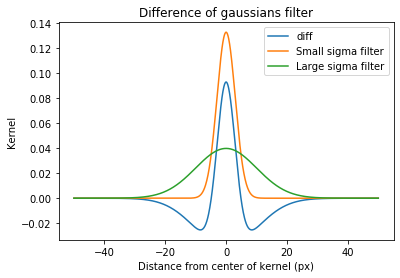

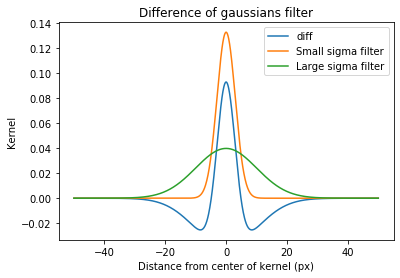

In [62]:
sigma_small = 1
sigma_large = 2.5

t0 = time.time()    

img = im_array_car4
im_diff_car42 = diff_gauss.diff_gauss(sigma_small, sigma_large, img, do_plot = 1)
t1 = time.time() - t0
print('{0} seconds'.format(int(t1)))

img = im_array_npy2r
im_diff_npy2r2 = diff_gauss.diff_gauss(sigma_small, sigma_large, img, do_plot = 0)
t1 = time.time() - t0
print('{0} seconds'.format(int(t1)))

img = im_array_vip
im_diff_vip2 = diff_gauss.diff_gauss(sigma_small, sigma_large, img, do_plot = 0)
t1 = time.time() - t0
print('{0} seconds'.format(int(t1)))

img = im_array_tac2
im_diff_tac22 = diff_gauss.diff_gauss(sigma_small, sigma_large, img, do_plot = 1)
t1 = time.time() - t0
print('{0} seconds'.format(int(t1)))

del img

In [63]:
t0 = time.time()
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3'

save_file = 'Car4_im_diff_sigma_small = {0}, sigma_large = {1}'.format(sigma_small, sigma_large)
h5f = h5py.File('{0}{1}{2}.h5'.format(save_loc, sep, save_file), 'w')
h5f.create_dataset('dataset_1', data=im_diff_car4)
h5f.close()

print('im_diff_Car4 saved: {0} seconds'.format(np.round(time.time() - t0)))
    
save_file = 'npy2r_im_diff_sigma_small = {0}, sigma_large = {1}'.format(sigma_small, sigma_large)
h5f = h5py.File('{0}{1}{2}.h5'.format(save_loc, sep, save_file), 'w')
h5f.create_dataset('dataset_1', data=im_diff_npy2r)
h5f.close()

print('im_diff_npy2r saved: {0} seconds'.format(np.round(time.time() - t0)))
    
save_file = 'Tac2_im_diff_sigma_small = {0}, sigma_large = {1}'.format(sigma_small, sigma_large)
h5f = h5py.File('{0}{1}{2}.h5'.format(save_loc, sep, save_file), 'w')
h5f.create_dataset('dataset_1', data=im_diff_tac2)
h5f.close()

print('im_diff_Tac2 saved: {0} seconds'.format(np.round(time.time() - t0)))
    
save_file = 'Vip_im_diff_sigma_small = {0}, sigma_large = {1}'.format(sigma_small, sigma_large)
h5f = h5py.File('{0}{1}{2}.h5'.format(save_loc, sep, save_file), 'w')
h5f.create_dataset('dataset_1', data=im_diff_vip)
h5f.close()

print('im_diff_vip saved: {0} seconds'.format(np.round(time.time() - t0)))

im_diff_Car4 saved: 10.0 seconds
im_diff_npy2r saved: 20.0 seconds
im_diff_Tac2 saved: 30.0 seconds
im_diff_vip saved: 40.0 seconds


## Binarize filtered images and plot threshold

Finding threshold for binarizing
Finding threshold for binarizing
Finding threshold for binarizing
Finding threshold for binarizing


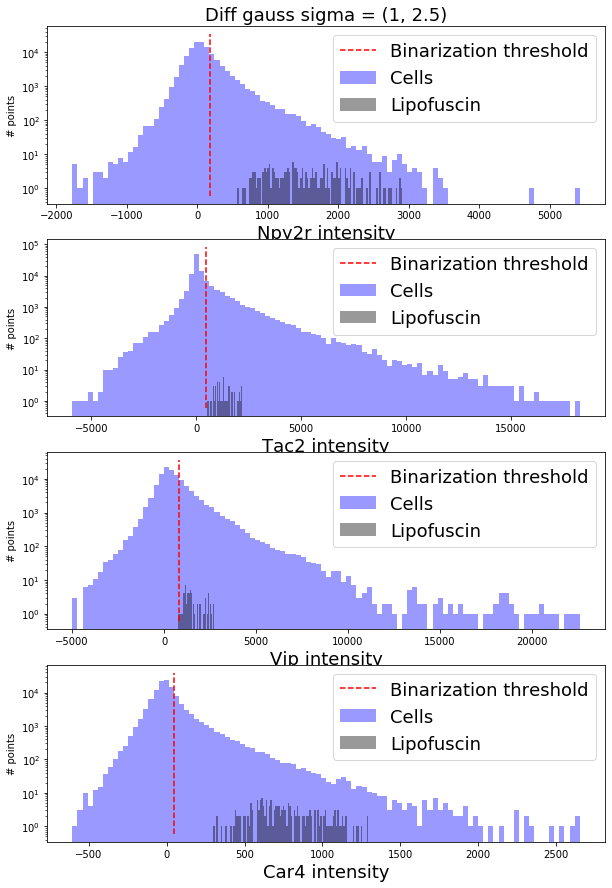

In [65]:
img_dict = {'Npy2r': im_diff_npy2r2, 'Tac2': im_diff_tac22, 'Vip': im_diff_vip2, 'Car4': im_diff_car42}
#img_dict = {'Npy2r': im_diff_npy2r, 'Tac2': im_diff_tac2, 'Vip': im_diff_vip, 'Car4': im_diff_car4}
#img_dict = {'Ndnf': im_array_ndnf, 'Sst': im_array_sst, 'Vip': im_array_vip}

pixels_dict = {'Cells': all_cell_pixels, 'Lipofuscin': all_lipo_pixels}
#pixels_dict = {'Cells': all_cell_pixels}

colors_dict = {'Cells': 'b', 'Lipofuscin': 'k'}

title = 'Diff gauss sigma = ({0}, {1})'.format(sigma_small, sigma_large)
#title = 'Raw images'
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3\\Plots'
save_file = '{0} hist lipo + cells.png'.format(title)
#save_file = '{0} hist cells.png'.format(title)

thresh_scale = 1

thresh = hist_channels.hist_channels(img_dict, pixels_dict, max_per_group= 100000, 
                                     do_bin = True, bin_group = 'Cells', thresh_scale = thresh_scale,
                                     colors_dict = colors_dict, 
                                     title = title, save = True, save_loc = save_loc, save_file = save_file)

del img_dict
del pixels_dict

im_bin_npy2r = np.zeros(im_diff_vip2.shape)
im_bin_car4 = np.zeros(im_diff_vip2.shape)
im_bin_vip = np.zeros(im_diff_vip2.shape)
im_bin_tac2 = np.zeros(im_diff_vip2.shape)

ix_npy2r = np.where(im_diff_npy2r2 > thresh['Npy2r'])
ix_tac2 = np.where(im_diff_tac22 > thresh['Tac2'])
ix_vip = np.where(im_diff_vip2 > thresh['Vip'])
ix_car4 = np.where(im_diff_car42 > thresh['Car4'])

im_bin_npy2r[ix_npy2r] = im_diff_npy2r2[ix_npy2r]
im_bin_tac2[ix_tac2] = im_diff_tac22[ix_tac2]
im_bin_vip[ix_vip] = im_diff_vip2[ix_vip]
im_bin_car4[ix_car4] = im_diff_car42[ix_car4]

## Find mahalanobis distance of pixels from lipofuscin cloud

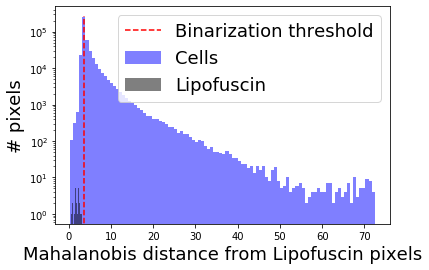

In [67]:
img_dict = {'Npy2r': im_bin_npy2r, 'Tac2': im_bin_tac2, 'Vip': im_bin_vip, 'Car4': im_bin_car4}
#img_dict = {'Ndnf': im_diff_ndnf, 'Sst': im_diff_sst, 'Vip': im_diff_vip}
#img_dict = {'Ndnf': im_array_ndnf, 'Sst': im_array_sst, 'Vip': im_array_vip}

pixels_dict = {'Cells': all_cell_pixels, 'Lipofuscin': all_lipo_pixels}

origin_group = 'Lipofuscin'
bin_group = 'Cells'

colors_dict = {'Cells': 'b', 'Lipofuscin': 'k'}

title = 'Diff gauss sigma = ({0}, {1}); binarized above {2} std from median'.format(sigma_small, sigma_large, thresh_scale)
#title = 'Raw images'
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3\\Plots'
save_file = '{0} hist lipo + cells.png'.format(title)
#save_file = '{0} hist cells.png'.format(title)

output = m_dist.m_dist(img_dict, pixels_dict, origin_group, bin_group, colors_dict = colors_dict, thresh_scale = 0,
                            title = title, save = True, save_loc = save_loc, save_file = save_file)

m_dist_vals = output['m_dist']
thresh = output['thresh']
cov = output['cov']

del img_dict
del pixels_dict

In [37]:
channel_names = list(img_dict.keys())
n_channels = len(channel_names)

px_groups = list(pixels_dict.keys())


# %% Get values for each channel for each pixel group
px_vals = {}

for group in px_groups:

    px = pixels_dict[group]


    px_vals[group] = {}

    for channel in channel_names:
        px_vals[group][channel] = img_dict[channel][(px[:, 0], px[:, 1], px[:, 2])]


# %% Get mean and covariance matrix of origin group
mu = np.zeros(n_channels)
origin_px = np.zeros([n_channels, px_vals[origin_group][channel_names[0]].shape[0]])
for c in range(n_channels):
    mu[c] = np.mean(px_vals[origin_group][channel_names[c]])
    origin_px[c, :] = px_vals[origin_group][channel_names[c]]

cov = np.cov(origin_px) 
VI = np.linalg.inv(cov)     

In [41]:
plt.figure()
plt.imshow(np.log(cov))
plt.colorbar(label = 'Log covariance')

## Use mahalanobis distance to label all lipofuscin pixels 

In [68]:
lipo_pixels = all_cell_pixels[m_dist_vals['Cells'] < thresh, :]
cell_pixels = all_cell_pixels[m_dist_vals['Cells'] > thresh, :]

im_array_lipo = np.zeros(im_array_vip.shape)
im_array_lipo[lipo_pixels[:, 0], lipo_pixels[:, 1], lipo_pixels[:, 2]] = np.ones(lipo_pixels.shape[0])


## Re-calculate cell masks excluding lipofuscin pixels

In [69]:
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\S3'
save_file = 'HCR_3.11_S3_cell_masks_without_lipofuscin.pkl'

cell_pixels_no_lipo = {}

cells = mask_vertices.keys()
n_px_total = 0
for cell in cells:
    
    data = Cell.cell_data[cell]
    planes = data['z_planes']
    cell_pixels_no_lipo[cell] = {}
    
    for plane in planes:
        
        cell_pixels_no_lipo[cell][plane] = {}
        n_px = mask_vertices[cell][plane][0].shape[0]
        m = m_dist_vals['Cells'][n_px_total:n_px_total + n_px] # Mahalanobis distance values for pixels in cell mask
        px_coords = np.array(mask_vertices[cell][plane])
        cell_pixels_no_lipo[cell][plane] = px_coords[:, m >= thresh]
        #cell_pixels_no_lipo[cell][plane] = px_coords[:, m ]
        n_px_total += n_px

if not n_px_total == all_cell_pixels.shape[0]:
    print('Total number of pixels incorrect, could have removed incorrect pixels for cell')\
    
with open('{0}{1}{2}'.format(save_loc, sep, save_file), 'wb') as f:
    pkl.dump(cell_pixels_no_lipo, f)

Total number of pixels incorrect, could have removed incorrect pixels for cell


## Delete large arrays

In [113]:
del im_diff_npy2r
del im_diff_tac2
del im_diff_vip
del im_bin_npy2r
del im_bin_vip
del im_bin_tac2

# Classify cells by gene expression

## Calculate intensity for each gene in each cell 

### Average intensity in all pixels in cell mask

In [33]:
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3'
save_file = 'S3_data_npy2r_tac2_car4.pkl'

try:
    with open('{0}\\{1}'.format(save_loc, save_file), 'rb') as f:
        sig = pkl.load(f)
    avg_intensity_npy2r = sig['Npy2r']
    avg_intensity_tac2 = sig['Tac2'] 
    avg_intensity_car4 = sig['Car4']
    print('Data loaded')

except:
    print('Data not found, calculating intensities')
    no_cells = len(Cell.cell_data.keys())
    avg_intensity_npy2r = np.zeros(no_cells)
    avg_intensity_car4 = np.zeros(no_cells)
    avg_intensity_tac2 = np.zeros(no_cells)

    for cell in range(no_cells):

        if np.mod(cell, 10) == 0:
            print('Cell {0}'.format(cell))
        cell_no = cell + 1
        cell_dict = Cell.cell_data[cell_no]
        z_planes = cell_dict['z_planes']

        intensity_npy2r = np.zeros(cell_dict['no_planes'])
        intensity_car4 = np.zeros(cell_dict['no_planes'])
        intensity_tac2 = np.zeros(cell_dict['no_planes'])

        i = 0
        for plane in np.array(z_planes).astype(int):

            xy_coord = mask_vertices[cell_no][plane]
            x = xy_coord[0]
            y = xy_coord[1]
            intensity_npy2r[i] = np.mean(im_array_npy2r[plane, x, y])
            intensity_car4[i] = np.mean(im_array_car4[plane, x, y])
            intensity_tac2[i] = np.mean(im_array_tac2[plane, x, y])
            i += 1

        avg_intensity_npy2r[cell] = np.mean(intensity_npy2r)
        avg_intensity_car4[cell] = np.mean(intensity_car4)
        avg_intensity_tac2[cell] = np.mean(intensity_tac2)

    with open('{0}\\{1}'.format(save_loc, save_file), 'wb') as f:
        pkl.dump({'npy2r': avg_intensity_npy2r, 'tac2': avg_intensity_tac2, 'car4':avg_intensity_car4}, f)


Data not found, calculating intensities
Cell 0
Cell 10
Cell 20
Cell 30
Cell 40
Cell 50
Cell 60
Cell 70
Cell 80
Cell 90
Cell 100
Cell 110
Cell 120
Cell 130


### Intensity in masks excluding lipofuscin pixels

In [71]:
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3'
save_file = 'S3_data2_npy2r_tac2_car4.pkl'

try:
    with open('{0}\\{1}'.format(save_loc, save_file), 'rb') as f:
        sig = pkl.load(f)
    int_npy2r = sig['Npy2r_lipo_excl']
    int_tac2 = sig['Tac2_lipo_excl'] 
    int_car4 = sig['Car4_lipo_excl']
    print('Data loaded')

except:
    print('Data not found, calculating intensities')
    no_cells = len(Cell.cell_data.keys())
    int_npy2r = np.zeros(no_cells)
    int_car4 = np.zeros(no_cells)
    int_tac2 = np.zeros(no_cells)

    for cell in range(no_cells):

        if np.mod(cell, 10) == 0:
            print('Cell {0}'.format(cell))
        cell_no = cell + 1
        cell_dict = Cell.cell_data[cell_no]
        z_planes = cell_dict['z_planes']

        intensity_npy2r = np.zeros(cell_dict['no_planes'])
        intensity_car4 = np.zeros(cell_dict['no_planes'])
        intensity_tac2 = np.zeros(cell_dict['no_planes'])

        i = 0
        for plane in np.array(z_planes).astype(int):

            xy_coord = cell_pixels_no_lipo[cell_no][plane]
            x = xy_coord[0]
            y = xy_coord[1]
            intensity_npy2r[i] = np.mean(im_array_npy2r[plane, x, y])
            intensity_car4[i] = np.mean(im_array_car4[plane, x, y])
            intensity_tac2[i] = np.mean(im_array_tac2[plane, x, y])
            i += 1

        int_npy2r[cell] = np.mean(intensity_npy2r)
        int_car4[cell] = np.mean(intensity_car4)
        int_tac2[cell] = np.mean(intensity_tac2)
        
        sig['Npy2r_lipo_excl'] = int_npy2r
        sig['Tac2_lipo_excl'] = int_tac2
        sig['Car4_lipo_excl'] = int_car4

    with open('{0}\\{1}'.format(save_loc, save_file), 'wb') as f:
            pkl.dump(sig, f)


Data not found, calculating intensities
Cell 0
Cell 10
Cell 20
Cell 30
Cell 40
Cell 50
Cell 60
Cell 70
Cell 80
Cell 90
Cell 100
Cell 110
Cell 120
Cell 130


### Intensity in masks excluding lipofuscin pixels in binarized images (essentially spot counting)

In [75]:
# Note: size of spot is also relevant here. 

save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3'
save_file = 'S3_data2_npy2r_tac2_car4.pkl'

try:
    with open('{0}\\{1}'.format(save_loc, save_file), 'rb') as f:
        sig = pkl.load(f)
    int_npy2r_bin = sig['Npy2r_lipo_excl_bin']
    int_tac2_bin = sig['Tac2_lipo_excl_bin'] 
    int_car4_bin = sig['Car4_lipo_excl_bin']
    print('Data loaded')

except:
    print('Data not found, calculating intensities')
    no_cells = len(Cell.cell_data.keys())
    int_npy2r_bin = np.zeros(no_cells)
    int_car4_bin = np.zeros(no_cells)
    int_tac2_bin = np.zeros(no_cells)

    for cell in range(no_cells):

        if np.mod(cell, 10) == 0:
            print('Cell {0}'.format(cell))
        cell_no = cell + 1
        cell_dict = Cell.cell_data[cell_no]
        z_planes = cell_dict['z_planes']

        intensity_npy2r = np.zeros(cell_dict['no_planes'])
        intensity_car4 = np.zeros(cell_dict['no_planes'])
        intensity_tac2 = np.zeros(cell_dict['no_planes'])

        i = 0
        for plane in np.array(z_planes).astype(int):

            xy_coord = cell_pixels_no_lipo[cell_no][plane]
            x = xy_coord[0]
            y = xy_coord[1]
            intensity_npy2r[i] = np.mean(im_bin_npy2r[plane, x, y])
            intensity_car4[i] = np.mean(im_bin_car4[plane, x, y])
            intensity_tac2[i] = np.mean(im_bin_tac2[plane, x, y])
            i += 1

        int_npy2r_bin[cell] = np.mean(intensity_npy2r)
        int_car4_bin[cell] = np.mean(intensity_car4)
        int_tac2_bin[cell] = np.mean(intensity_tac2)
        
        sig['Npy2r_lipo_excl_bin'] = int_npy2r_bin
        sig['Tac2_lipo_excl_bin'] = int_tac2_bin
        sig['Car4_lipo_excl_bin'] = int_car4_bin

    with open('{0}\\{1}'.format(save_loc, save_file), 'wb') as f:
            pkl.dump(sig, f)


Data loaded
Data not found, calculating intensities
Cell 0
Cell 10
Cell 20
Cell 30
Cell 40
Cell 50
Cell 60
Cell 70
Cell 80
Cell 90
Cell 100
Cell 110
Cell 120
Cell 130


### Intensity in masks excluding lipofuscin pixels in diff images

In [106]:
# Note: size of spot is also relevant here. 

save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3'
save_file = 'S3_data2_npy2r_tac2_car4.pkl'

try:
    with open('{0}\\{1}'.format(save_loc, save_file), 'rb') as f:
        sig = pkl.load(f)
    int_npy2r_diff = sig['Npy2r_lipo_excl_diff']
    int_tac2_diff = sig['Tac2_lipo_excl_diff'] 
    int_car4_diff = sig['Car4_lipo_excl_diff']
    print('Data loaded')

except:
    print('Data not found, calculating intensities')
    no_cells = len(Cell.cell_data.keys())
    int_npy2r_diff = np.zeros(no_cells)
    int_car4_diff = np.zeros(no_cells)
    int_tac2_diff = np.zeros(no_cells)

    for cell in range(no_cells):

        if np.mod(cell, 10) == 0:
            print('Cell {0}'.format(cell))
        cell_no = cell + 1
        cell_dict = Cell.cell_data[cell_no]
        z_planes = cell_dict['z_planes']

        intensity_npy2r = np.zeros(cell_dict['no_planes'])
        intensity_car4 = np.zeros(cell_dict['no_planes'])
        intensity_tac2 = np.zeros(cell_dict['no_planes'])

        i = 0
        for plane in np.array(z_planes).astype(int):

            xy_coord = cell_pixels_no_lipo[cell_no][plane]
            x = xy_coord[0]
            y = xy_coord[1]
            intensity_npy2r[i] = np.mean(im_diff_npy2r2[plane, x, y])
            intensity_car4[i] = np.mean(im_diff_car42[plane, x, y])
            intensity_tac2[i] = np.mean(im_diff_tac22[plane, x, y])
            i += 1

        int_npy2r_diff[cell] = np.mean(intensity_npy2r)
        int_car4_diff[cell] = np.mean(intensity_car4)
        int_tac2_diff[cell] = np.mean(intensity_tac2)
        
        sig['Npy2r_lipo_excl_bin'] = int_npy2r_diff
        sig['Tac2_lipo_excl_bin'] = int_tac2_diff
        sig['Car4_lipo_excl_bin'] = int_car4_diff

    with open('{0}\\{1}'.format(save_loc, save_file), 'wb') as f:
            pkl.dump(sig, f)


Data not found, calculating intensities
Cell 0
Cell 10
Cell 20
Cell 30
Cell 40
Cell 50
Cell 60
Cell 70
Cell 80
Cell 90
Cell 100
Cell 110
Cell 120
Cell 130


## Local background

### Raw images

In [38]:
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3'
save_file = 'S3_background_npy2r_tac2_car4.pkl'

try:
    with open('{0}\\{1}'.format(save_loc, save_file), 'rb') as f:
        dict = pkl.load(f)
    
    avg_bg_npy2r = dict['npy2r'] 
    avg_bg_tac2 = dict['tac2']  
    avg_bg_car4 = dict['car4']
    centers = dict['Centers']
    n_vert_all = dict['n_vert_all']
    bg_all = dict['bg_all']
    
    print('Data loaded')

except:
    
    print('Data not found, calculating background values')
    bg_all = np.ones([n, h, w])
    n_vert_all = {}
    centers = {}

    no_cells = len(Cell.cell_data.keys())
    for cell in range(no_cells):

        cell_no = cell + 1
        cell_dict = Cell.cell_data[cell_no]
        z_planes = cell_dict['z_planes']
        n_vert_all[cell] = {}
        centers[cell] = {}

        for plane in np.array(z_planes).astype(int):

            xy_coord = mask_vertices[cell_no][plane]
            x = xy_coord[0]
            y = xy_coord[1]
            z = plane
            centers[cell][plane] = np.array([np.mean(x), np.mean(y)]).astype(int)


            bg_all[z, x, y] = np.zeros([1, len(x)])

            n_vert_all[cell][plane] = len(x) 
            
    # fig, ax = plt.subplots(nrows = 3, ncols = 20)
    um_per_px = 0.19
    no_cells = len(Cell.cell_data.keys())
    avg_bg_npy2r = np.zeros(no_cells)
    avg_bg_car4 = np.zeros(no_cells)
    avg_bg_tac2 = np.zeros(no_cells)

    local_region = 50 # in um
    local_px = int(local_region/um_per_px/2)

    min_dist = 10 # in um
    min_dist_px = min_dist/um_per_px

    for cell in range(no_cells):
        cell_no = cell + 1
        cell_dict = Cell.cell_data[cell_no]
        z_planes = cell_dict['z_planes']

        bg_npy2r = np.zeros(len(z_planes))
        bg_car4 = np.zeros(len(z_planes))
        bg_tac2 = np.zeros(len(z_planes))

        p = 0
        for plane in np.array(z_planes).astype(int):

            center = centers[cell][plane]
            n_verts = n_vert_all[cell][plane]

            x1 = np.max([0, center[0] - local_px])
            x2 = np.min([h, center[0] + local_px])
            y1 = np.max([0, center[1] - local_px])
            y2 = np.min([w, center[1] + local_px])

            center_local = [local_px, local_px]

            local_bg = bg_all[plane, x1:x2, y1:y2].astype(bool)
            local_im_npy2r = im_array_npy2r[plane, x1:x2, y1:y2]
            local_im_tac2 = im_array_tac2[plane, x1:x2, y1:y2]
            local_im_car4 = im_array_car4[plane, x1:x2, y1:y2]

    #         ax[0, cell].imshow(local_im, vmin = np.min(local_im), vmax = np.max(local_im)/2)

    #         ax[1, cell].imshow(local_bg)

            verts = np.array(np.where(local_bg))
            dist_from_center = np.linalg.norm(verts - np.reshape(center_local, [2, 1]), axis = 0)
            verts = verts[:, dist_from_center > min_dist_px]
            dist_from_center = dist_from_center[dist_from_center > min_dist_px]

            order = np.argsort(dist_from_center)
            n_verts = np.min([n_verts, len(order)])

            x_bg = verts[0][order[0:n_verts]]
            y_bg = verts[1][order[0:n_verts]]

            local_bg = np.zeros(local_bg.shape).astype(bool)
            local_bg[x_bg, y_bg] = np.ones(n_verts)

    #         ax[2, cell].imshow(local_bg)

            bg_npy2r[p] = np.mean(local_im_npy2r[local_bg])
            bg_car4[p] = np.mean(local_im_car4[local_bg])
            bg_tac2[p] = np.mean(local_im_tac2[local_bg])

            p += 1



        avg_bg_npy2r[cell] = np.mean(bg_npy2r)
        avg_bg_car4[cell] = np.mean(bg_car4)
        avg_bg_tac2[cell] = np.mean(bg_tac2)

    with open('{0}\\{1}'.format(save_loc, save_file), 'wb') as f:
        pkl.dump({'npy2r': avg_bg_npy2r, 'tac2': avg_bg_tac2, 'car4':avg_bg_car4, 'Centers': centers, 
                  'n_vert_all':n_vert_all, 
                  #'bg_all': bg_all
                 }, f)
            
    #del bg_all

Data not found, calculating background values


### Binarized images

In [78]:
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3'
save_file = 'S3_background2_npy2r_tac2_car4.pkl'

try:
    with open('{0}\\{1}'.format(save_loc, save_file), 'rb') as f:
        bg_dict = pkl.load(f)   
    
    centers = bg_dict['Centers']
    n_vert_all = bg_dict['n_vert_all']
    bg_all = bg_dict['bg_all']
    avg_bg_npy2r_bin = bg_dict['npy2r_bin'] 
    avg_bg_tac2_bin = bg_dict['tac2_bin']  
    avg_bg_car4_bin = bg_dict['car4_bin']

    print('Data loaded')

except:
    
    print('Data not found, calculating background values')
    bg_all = np.ones([n, h, w])
    n_vert_all = {}
    centers = {}

    no_cells = len(Cell.cell_data.keys())
    for cell in range(no_cells):

        cell_no = cell + 1
        cell_dict = Cell.cell_data[cell_no]
        z_planes = cell_dict['z_planes']
        n_vert_all[cell] = {}
        centers[cell] = {}

        for plane in np.array(z_planes).astype(int):

            xy_coord = mask_vertices[cell_no][plane]
            x = xy_coord[0]
            y = xy_coord[1]
            z = plane
            centers[cell][plane] = np.array([np.mean(x), np.mean(y)]).astype(int)


            bg_all[z, x, y] = np.zeros([1, len(x)])

            n_vert_all[cell][plane] = len(x) 
            
    # fig, ax = plt.subplots(nrows = 3, ncols = 20)
    um_per_px = 0.19
    no_cells = len(Cell.cell_data.keys())
    avg_bg_npy2r_bin = np.zeros(no_cells)
    avg_bg_car4_bin = np.zeros(no_cells)
    avg_bg_tac2_bin = np.zeros(no_cells)

    local_region = 50 # in um
    local_px = int(local_region/um_per_px/2)

    min_dist = 10 # in um
    min_dist_px = min_dist/um_per_px

    for cell in range(no_cells):
        cell_no = cell + 1
        if np.mod(cell, 10) == 0:
            print('Cell {0}'.format(cell))
        cell_dict = Cell.cell_data[cell_no]
        z_planes = cell_dict['z_planes']

        bg_npy2r = np.zeros(len(z_planes))
        bg_car4 = np.zeros(len(z_planes))
        bg_tac2 = np.zeros(len(z_planes))

        p = 0
        for plane in np.array(z_planes).astype(int):

            center = centers[cell][plane]
            n_verts = n_vert_all[cell][plane]

            x1 = np.max([0, center[0] - local_px])
            x2 = np.min([h, center[0] + local_px])
            y1 = np.max([0, center[1] - local_px])
            y2 = np.min([w, center[1] + local_px])

            center_local = [local_px, local_px]

            local_bg = bg_all[plane, x1:x2, y1:y2].astype(bool)
            local_im_npy2r = im_bin_npy2r[plane, x1:x2, y1:y2]
            local_im_tac2 = im_bin_tac2[plane, x1:x2, y1:y2]
            local_im_car4 = im_bin_car4[plane, x1:x2, y1:y2]

    #         ax[0, cell].imshow(local_im, vmin = np.min(local_im), vmax = np.max(local_im)/2)

    #         ax[1, cell].imshow(local_bg)

            verts = np.array(np.where(local_bg))
            dist_from_center = np.linalg.norm(verts - np.reshape(center_local, [2, 1]), axis = 0)
            verts = verts[:, dist_from_center > min_dist_px]
            dist_from_center = dist_from_center[dist_from_center > min_dist_px]

            order = np.argsort(dist_from_center)
            n_verts = np.min([n_verts, len(order)])

            x_bg = verts[0][order[0:n_verts]]
            y_bg = verts[1][order[0:n_verts]]

            local_bg = np.zeros(local_bg.shape).astype(bool)
            local_bg[x_bg, y_bg] = np.ones(n_verts)

    #         ax[2, cell].imshow(local_bg)

            bg_npy2r[p] = np.mean(local_im_npy2r[local_bg])
            bg_car4[p] = np.mean(local_im_car4[local_bg])
            bg_tac2[p] = np.mean(local_im_tac2[local_bg])

            p += 1



        avg_bg_npy2r_bin[cell] = np.mean(bg_npy2r)
        avg_bg_car4_bin[cell] = np.mean(bg_car4)
        avg_bg_tac2_bin[cell] = np.mean(bg_tac2)
        
    bg_dict['npy2r_bin'] = avg_bg_npy2r_bin 
    bg_dict['tac2_bin'] = avg_bg_tac2_bin 
    bg_dict['car4_bin'] = avg_bg_car4_bin 

    with open('{0}\\{1}'.format(save_loc, save_file), 'wb') as f:
        pkl.dump(bg_dict, f)
            
    del bg_all

Data not found, calculating background values
Cell 0
Cell 10
Cell 20
Cell 30
Cell 40
Cell 50
Cell 60
Cell 70
Cell 80
Cell 90
Cell 100
Cell 110
Cell 120
Cell 130


### Diff images

In [99]:
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3'
save_file = 'S3_background2_npy2r_tac2_car4.pkl'

try:
    with open('{0}\\{1}'.format(save_loc, save_file), 'rb') as f:
        bg_dict = pkl.load(f)   
    
    centers = bg_dict['Centers']
    n_vert_all = bg_dict['n_vert_all']
    bg_all = bg_dict['bg_all']
    avg_bg_npy2r_diff = bg_dict['npy2r_diff'] 
    avg_bg_tac2_diff = bg_dict['tac2_diff']  
    avg_bg_car4_diff = bg_dict['car4_diff']

    print('Data loaded')

except:
    
    print('Data not found, calculating background values')
    bg_all = np.ones([n, h, w])
    n_vert_all = {}
    centers = {}

    no_cells = len(Cell.cell_data.keys())
    for cell in range(no_cells):

        cell_no = cell + 1
        cell_dict = Cell.cell_data[cell_no]
        z_planes = cell_dict['z_planes']
        n_vert_all[cell] = {}
        centers[cell] = {}

        for plane in np.array(z_planes).astype(int):

            xy_coord = mask_vertices[cell_no][plane]
            x = xy_coord[0]
            y = xy_coord[1]
            z = plane
            centers[cell][plane] = np.array([np.mean(x), np.mean(y)]).astype(int)


            bg_all[z, x, y] = np.zeros([1, len(x)])

            n_vert_all[cell][plane] = len(x) 
            
    # fig, ax = plt.subplots(nrows = 3, ncols = 20)
    um_per_px = 0.19
    no_cells = len(Cell.cell_data.keys())
    avg_bg_npy2r_diff = np.zeros(no_cells)
    avg_bg_car4_diff = np.zeros(no_cells)
    avg_bg_tac2_diff = np.zeros(no_cells)

    local_region = 50 # in um
    local_px = int(local_region/um_per_px/2)

    min_dist = 10 # in um
    min_dist_px = min_dist/um_per_px

    for cell in range(no_cells):
        cell_no = cell + 1
        if np.mod(cell, 10) == 0:
            print('Cell {0}'.format(cell))
        cell_dict = Cell.cell_data[cell_no]
        z_planes = cell_dict['z_planes']

        bg_npy2r = np.zeros(len(z_planes))
        bg_car4 = np.zeros(len(z_planes))
        bg_tac2 = np.zeros(len(z_planes))

        p = 0
        for plane in np.array(z_planes).astype(int):

            center = centers[cell][plane]
            n_verts = n_vert_all[cell][plane]

            x1 = np.max([0, center[0] - local_px])
            x2 = np.min([h, center[0] + local_px])
            y1 = np.max([0, center[1] - local_px])
            y2 = np.min([w, center[1] + local_px])

            center_local = [local_px, local_px]

            local_bg = bg_all[plane, x1:x2, y1:y2].astype(bool)
            local_im_npy2r = im_diff_npy2r2[plane, x1:x2, y1:y2]
            local_im_tac2 = im_diff_tac22[plane, x1:x2, y1:y2]
            local_im_car4 = im_diff_car42[plane, x1:x2, y1:y2]

    #         ax[0, cell].imshow(local_im, vmin = np.min(local_im), vmax = np.max(local_im)/2)

    #         ax[1, cell].imshow(local_bg)

            verts = np.array(np.where(local_bg))
            dist_from_center = np.linalg.norm(verts - np.reshape(center_local, [2, 1]), axis = 0)
            verts = verts[:, dist_from_center > min_dist_px]
            dist_from_center = dist_from_center[dist_from_center > min_dist_px]

            order = np.argsort(dist_from_center)
            n_verts = np.min([n_verts, len(order)])

            x_bg = verts[0][order[0:n_verts]]
            y_bg = verts[1][order[0:n_verts]]

            local_bg = np.zeros(local_bg.shape).astype(bool)
            local_bg[x_bg, y_bg] = np.ones(n_verts)

    #         ax[2, cell].imshow(local_bg)

            bg_npy2r[p] = np.mean(local_im_npy2r[local_bg])
            bg_car4[p] = np.mean(local_im_car4[local_bg])
            bg_tac2[p] = np.mean(local_im_tac2[local_bg])

            p += 1



        avg_bg_npy2r_diff[cell] = np.mean(bg_npy2r)
        avg_bg_car4_diff[cell] = np.mean(bg_car4)
        avg_bg_tac2_diff[cell] = np.mean(bg_tac2)
        
    bg_dict['npy2r_bin'] = avg_bg_npy2r_diff 
    bg_dict['tac2_bin'] = avg_bg_tac2_diff 
    bg_dict['car4_bin'] = avg_bg_car4_diff 

    with open('{0}\\{1}'.format(save_loc, save_file), 'wb') as f:
        pkl.dump(bg_dict, f)
            
    del bg_all

Data not found, calculating background values
Cell 0
Cell 10
Cell 20
Cell 30
Cell 40
Cell 50
Cell 60
Cell 70
Cell 80
Cell 90
Cell 100
Cell 110
Cell 120
Cell 130


### Calculate mask centers

In [101]:
bg_all = np.ones([n, h, w])
n_vert_all = {}
centers = {}

no_cells = len(Cell.cell_data.keys())
for cell in range(no_cells):

    cell_no = cell + 1
    cell_dict = Cell.cell_data[cell_no]
    z_planes = cell_dict['z_planes']
    n_vert_all[cell] = {}
    centers[cell] = {}

    for plane in np.array(z_planes).astype(int):

        xy_coord = mask_vertices[cell_no][plane]
        x = xy_coord[0]
        y = xy_coord[1]
        z = plane
        centers[cell][plane] = np.array([np.mean(x), np.mean(y)]).astype(int)


        bg_all[z, x, y] = np.zeros([1, len(x)])

        n_vert_all[cell][plane] = len(x) 

In [78]:
save_file

'S1_background_ndnf_sst_vip.pkl'

In [94]:
with open('{0}\\{1}'.format(save_loc, save_file), 'wb') as f:
            pkl.dump({'Ndnf': avg_bg_ndnf, 'Sst': avg_bg_sst, 'Vip':avg_bg_vip, 'Centers': centers,
                     'n_vert_all': n_vert_all, 'bg_all': bg_all}, f)

In [127]:
del all_cell_pixels

## Use background to estimate significance of signal

### Get bootstrap sample means from background

#### Raw images

In [46]:
t0 = time.time()

save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3'
save_file = 'S3_bootstrap.pkl'

# Parameters
n_sample = 1000 # Number of samples to calculate bootstrap confidence interval
um_per_px = 0.19
local_region = 50 # in um
min_dist = 10 # in um
bg_factor = 4 # Take 4x the number of pixels in the mask of the cell, for local background - it will still be local but you'll
            # get a better estimate of background by averaging over more pixels.

try:
    with open('{0}\\{1}'.format(save_loc, save_file), 'rb') as f:
        d = pkl.load(f)
    bg_bs_npy2r = d['npy2r']
    bg_bs_tac2 = d['tac2']
    bg_bs_car4 = d['car4']
    print('Data loaded')
    
except:
    print('No data found, calculating p values')

    no_cells = len(Cell.cell_data.keys())
    bg_bs_npy2r = {}
    bg_bs_tac2 = {}
    bg_bs_car4 = {}

    local_px = int(local_region/um_per_px/2)
    min_dist_px = min_dist/um_per_px

    for cell in range(no_cells):

        if np.mod(cell, 10) == 0:
            print('Cell {0}: {1} seconds'.format(cell, np.round(time.time() - t0)))

        cell_no = cell + 1
        cell_dict = Cell.cell_data[cell_no]
        z_planes = cell_dict['z_planes']

        bg_bs_npy2r[cell] = {}
        bg_bs_tac2[cell] = {}
        bg_bs_car4[cell] = {}
        
        p = 0

        for plane in np.array(z_planes).astype(int):

            bg_bs_npy2r[cell][plane] = np.zeros(n_sample)
            bg_bs_tac2[cell][plane] = np.zeros(n_sample)
            bg_bs_car4[cell][plane] = np.zeros(n_sample)
            
            center = centers[cell][plane]
            n_verts = n_vert_all[cell][plane]

            x1 = np.max([0, center[0] - local_px])
            x2 = np.min([h, center[0] + local_px])
            y1 = np.max([0, center[1] - local_px])
            y2 = np.min([w, center[1] + local_px])

            center_local = [local_px, local_px]

            local_bg = bg_all[plane, x1:x2, y1:y2].astype(bool)

            verts = np.array(np.where(local_bg))
            dist_from_center = np.linalg.norm(verts - np.reshape(center_local, [2, 1]), 
                                              axis = 0)
            verts = verts[:, dist_from_center > min_dist_px]
            dist_from_center = dist_from_center[dist_from_center > min_dist_px]

            order = np.argsort(dist_from_center)
            n_verts_bg = np.min([bg_factor*n_verts, len(order)])

            verts = verts[:, order[0:n_verts_bg]]
            samples = np.random.choice(np.linspace(0, n_verts_bg - 1, n_verts_bg).astype(int), 
                                       (n_verts, n_sample), replace = True)
            x_bs = verts[0][samples]
            y_bs = verts[1][samples]

            local_im_npy2r = im_array_npy2r[plane, x1:x2, y1:y2]
            local_im_tac2 = im_array_tac2[plane, x1:x2, y1:y2]
            local_im_car4 = im_array_car4[plane, x1:x2, y1:y2]


            local_bg_bs = np.zeros([x2 - x1, y2 - y1]).astype(bool)
            for s in range(n_sample):
                local_bg_bs[x_bs[:, s], y_bs[:, s]] = np.ones(n_verts)
                bg_bs_npy2r[cell][plane][s] = np.mean(local_im_npy2r[local_bg_bs])
                bg_bs_car4[cell][plane][s] = np.mean(local_im_car4[local_bg_bs])
                bg_bs_tac2[cell][plane][s] = np.mean(local_im_tac2[local_bg_bs])

            p += 1

    with open('{0}\\{1}'.format(save_loc, save_file), 'wb') as f:
        pkl.dump({'npy2r': bg_bs_npy2r, 'car4': bg_bs_car4, 'tac2': bg_bs_tac2}, f)     
    

No data found, calculating p values
Cell 0: 0.0 seconds
Cell 10: 4.0 seconds
Cell 20: 8.0 seconds
Cell 30: 13.0 seconds
Cell 40: 16.0 seconds
Cell 50: 20.0 seconds
Cell 60: 25.0 seconds
Cell 70: 29.0 seconds
Cell 80: 33.0 seconds
Cell 90: 38.0 seconds
Cell 100: 42.0 seconds
Cell 110: 46.0 seconds
Cell 120: 51.0 seconds
Cell 130: 54.0 seconds


#### Binarized images

In [102]:
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3'
save_file = 'S3_bootstrap2.pkl'

# Parameters
n_sample = 1000 # Number of samples to calculate bootstrap confidence interval
um_per_px = 0.19
local_region = 50 # in um
min_dist = 10 # in um
bg_factor = 10 # Take 10x the number of pixels in the mask of the cell, for local background - it will still be local but you'll
            # get a better estimate of background by averaging over more pixels.

t0 = time.time()
try:
    with open('{0}\\{1}'.format(save_loc, save_file), 'rb') as f:
        data_dict = pkl.load(f)
    bg_bs_npy2r_diff = data_dict['npy2r_diff']
    bg_bs_tac2_diff = data_dict['tac2_diff']
    bg_bs_car4_diff = data_dict['car4_diff']
    print('Data loaded')
    
except:
    print('No data found, calculating p values')

    no_cells = len(Cell.cell_data.keys())
    bg_bs_npy2r_diff = {}
    bg_bs_tac2_diff = {}
    bg_bs_car4_diff = {}

    local_px = int(local_region/um_per_px/2)
    min_dist_px = min_dist/um_per_px

    for cell in range(no_cells):

        if np.mod(cell, 10) == 0:
            t1 = np.round(time.time() - t0)
            print('Cell {0}, {1} seconds'.format(cell, t1))

        cell_no = cell + 1
        cell_dict = Cell.cell_data[cell_no]
        z_planes = cell_dict['z_planes']

        bg_bs_npy2r_diff[cell] = {}
        bg_bs_tac2_diff[cell] = {}
        bg_bs_car4_diff[cell] = {}
        
        p = 0

        for plane in np.array(z_planes).astype(int):

            bg_bs_npy2r_diff[cell][plane] = np.zeros(n_sample)
            bg_bs_tac2_diff[cell][plane] = np.zeros(n_sample)
            bg_bs_car4_diff[cell][plane] = np.zeros(n_sample)
            
            center = centers[cell][plane]
            n_verts = n_vert_all[cell][plane]

            x1 = np.max([0, center[0] - local_px])
            x2 = np.min([h, center[0] + local_px])
            y1 = np.max([0, center[1] - local_px])
            y2 = np.min([w, center[1] + local_px])

            center_local = [local_px, local_px]

            local_bg = bg_all[plane, x1:x2, y1:y2].astype(bool)

            verts = np.array(np.where(local_bg))
            dist_from_center = np.linalg.norm(verts - np.reshape(center_local, [2, 1]), 
                                              axis = 0)
            verts = verts[:, dist_from_center > min_dist_px]
            dist_from_center = dist_from_center[dist_from_center > min_dist_px]

            order = np.argsort(dist_from_center)
            n_verts_bg = np.min([bg_factor*n_verts, len(order)])

            verts = verts[:, order[0:n_verts_bg]]
            samples = np.random.choice(np.linspace(0, n_verts_bg - 1, n_verts_bg).astype(int), 
                                       (n_verts, n_sample), replace = True)
            x_bs = verts[0][samples]
            y_bs = verts[1][samples]

            local_im_npy2r = im_diff_npy2r2[plane, x1:x2, y1:y2]
            local_im_tac2 = im_diff_tac22[plane, x1:x2, y1:y2]
            local_im_car4 = im_diff_car42[plane, x1:x2, y1:y2]


            local_bg_bs = np.zeros([x2 - x1, y2 - y1]).astype(bool)
            for s in range(n_sample):
                local_bg_bs[x_bs[:, s], y_bs[:, s]] = np.ones(n_verts)
                bg_bs_npy2r_diff[cell][plane][s] = np.mean(local_im_npy2r[local_bg_bs])
                bg_bs_car4_diff[cell][plane][s] = np.mean(local_im_car4[local_bg_bs])
                bg_bs_tac2_diff[cell][plane][s] = np.mean(local_im_tac2[local_bg_bs])

            p += 1
            
    data_dict['npy2r_diff'] = bg_bs_npy2r_diff 
    data_dict['tac2_diff'] = bg_bs_tac2_diff 
    data_dict['car4_diff'] = bg_bs_car4_diff 

    with open('{0}\\{1}'.format(save_loc, save_file), 'wb') as f:
        pkl.dump(data_dict, f)     
    

No data found, calculating p values
Cell 0, 0.0 seconds
Cell 10, 6.0 seconds


KeyboardInterrupt: 

#### Diff images

In [103]:
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3'
save_file = 'S3_bootstrap2.pkl'

# Parameters
n_sample = 1000 # Number of samples to calculate bootstrap confidence interval
um_per_px = 0.19
local_region = 50 # in um
min_dist = 10 # in um
bg_factor = 10 # Take 10x the number of pixels in the mask of the cell, for local background - it will still be local but you'll
            # get a better estimate of background by averaging over more pixels.

t0 = time.time()
try:
    with open('{0}\\{1}'.format(save_loc, save_file), 'rb') as f:
        data_dict = pkl.load(f)
    bg_bs_npy2r_diff = data_dict['npy2r_diff']
    bg_bs_tac2_diff = data_dict['tac2_diff']
    bg_bs_car4_diff = data_dict['car4_diff']
    print('Data loaded')
    
except:
    print('No data found, calculating p values')

    no_cells = len(Cell.cell_data.keys())
    bg_bs_npy2r_diff = {}
    bg_bs_tac2_diff = {}
    bg_bs_car4_diff = {}

    local_px = int(local_region/um_per_px/2)
    min_dist_px = min_dist/um_per_px

    for cell in range(no_cells):

        if np.mod(cell, 10) == 0:
            t1 = np.round(time.time() - t0)
            print('Cell {0}, {1} seconds'.format(cell, t1))

        cell_no = cell + 1
        cell_dict = Cell.cell_data[cell_no]
        z_planes = cell_dict['z_planes']

        bg_bs_npy2r_diff[cell] = {}
        bg_bs_tac2_diff[cell] = {}
        bg_bs_car4_diff[cell] = {}
        
        p = 0

        for plane in np.array(z_planes).astype(int):

            bg_bs_npy2r_diff[cell][plane] = np.zeros(n_sample)
            bg_bs_tac2_diff[cell][plane] = np.zeros(n_sample)
            bg_bs_car4_diff[cell][plane] = np.zeros(n_sample)
            
            center = centers[cell][plane]
            n_verts = n_vert_all[cell][plane]

            x1 = np.max([0, center[0] - local_px])
            x2 = np.min([h, center[0] + local_px])
            y1 = np.max([0, center[1] - local_px])
            y2 = np.min([w, center[1] + local_px])

            center_local = [local_px, local_px]

            local_bg = bg_all[plane, x1:x2, y1:y2].astype(bool)

            verts = np.array(np.where(local_bg))
            dist_from_center = np.linalg.norm(verts - np.reshape(center_local, [2, 1]), 
                                              axis = 0)
            verts = verts[:, dist_from_center > min_dist_px]
            dist_from_center = dist_from_center[dist_from_center > min_dist_px]

            order = np.argsort(dist_from_center)
            n_verts_bg = np.min([bg_factor*n_verts, len(order)])

            verts = verts[:, order[0:n_verts_bg]]
            samples = np.random.choice(np.linspace(0, n_verts_bg - 1, n_verts_bg).astype(int), 
                                       (n_verts, n_sample), replace = True)
            x_bs = verts[0][samples]
            y_bs = verts[1][samples]

            local_im_npy2r = im_bin_npy2r[plane, x1:x2, y1:y2]
            local_im_tac2 = im_bin_tac2[plane, x1:x2, y1:y2]
            local_im_car4 = im_bin_car4[plane, x1:x2, y1:y2]


            local_bg_bs = np.zeros([x2 - x1, y2 - y1]).astype(bool)
            for s in range(n_sample):
                local_bg_bs[x_bs[:, s], y_bs[:, s]] = np.ones(n_verts)
                bg_bs_npy2r_diff[cell][plane][s] = np.mean(local_im_npy2r[local_bg_bs])
                bg_bs_car4_diff[cell][plane][s] = np.mean(local_im_car4[local_bg_bs])
                bg_bs_tac2_diff[cell][plane][s] = np.mean(local_im_tac2[local_bg_bs])

            p += 1
            
    data_dict['npy2r_bin'] = bg_bs_npy2r_diff 
    data_dict['tac2_bin'] = bg_bs_tac2_diff 
    data_dict['car4_bin'] = bg_bs_car4_diff 

    with open('{0}\\{1}'.format(save_loc, save_file), 'wb') as f:
        pkl.dump(data_dict, f)     
    

No data found, calculating p values
Cell 0, 0.0 seconds
Cell 10, 6.0 seconds
Cell 20, 10.0 seconds
Cell 30, 16.0 seconds
Cell 40, 20.0 seconds
Cell 50, 26.0 seconds
Cell 60, 32.0 seconds
Cell 70, 38.0 seconds
Cell 80, 43.0 seconds
Cell 90, 49.0 seconds
Cell 100, 54.0 seconds
Cell 110, 59.0 seconds
Cell 120, 65.0 seconds
Cell 130, 70.0 seconds


### Calculate p-value  and confidence interval

In [107]:
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3'
save_file1 = 'S3_pvals2.pkl'
save_file2 = 'S3_conf_intvls2.pkl'
save_file3 = 'S3_pvals_lipo_excl2.pkl'
save_file4 = 'S3_pvals_lipo_excl_bin2.pkl'
save_file5 = 'S3_pvals_lipo_excl_diff.pkl'

p_value = 0.05 # Threshold for calling signal significantly different from background

try:
    with open('{0}\\{1}'.format(save_loc, save_file1), 'rb') as f:
        p_vals = pkl.load(f)
        pv_npy2r = p_vals['npy2r']
        pv_tac2 = p_vals['tac2']
        pv_car4 = p_vals['car4']
    print('Loaded p values for raw images')
    
    with open('{0}\\{1}'.format(save_loc, save_file2), 'rb') as f:
        ci = pkl.load(f)
        ci_npy2r = ci['npy2r']
        ci_tac2 = ci['tac2']
        ci_car4 = ci['car4']
    print('Loaded confidence intervals')
    
    with open('{0}\\{1}'.format(save_loc, save_file3), 'rb') as f:
        p_vals = pkl.load(f)
        pv_npy2r2 = p_vals['npy2r']
        pv_tac22 = p_vals['tac2']
        pv_car42 = p_vals['car4']
    print('Loaded p values for lipofuscin excluded masks')
    
    with open('{0}\\{1}'.format(save_loc, save_file4), 'rb') as f:
        p_vals = pkl.load(f)
        pv_npy2r3 = p_vals['npy2r']
        pv_tac23 = p_vals['tac2']
        pv_car43 = p_vals['car4']
    print('Loaded p values for lipofuscin excluded masks in binarized images')

    with open('{0}\\{1}'.format(save_loc, save_file5), 'rb') as f:
        p_vals = pkl.load(f)
        pv_npy2r4 = p_vals['npy2r']
        pv_tac24 = p_vals['tac2']
        pv_car44 = p_vals['car4']
    print('Loaded p values for lipofuscin excluded masks in binarized images')

except:
    print('Data not found; calculating')
    
    ci_npy2r = np.zeros(no_cells)
    ci_car4 = np.zeros(no_cells)
    ci_tac2 = np.zeros(no_cells)

    pv_npy2r = np.zeros(no_cells)
    pv_car4 = np.zeros(no_cells)
    pv_tac2 = np.zeros(no_cells)
    
    pv_npy2r2 = np.zeros(no_cells)
    pv_car42 = np.zeros(no_cells)
    pv_tac22 = np.zeros(no_cells)
    
    pv_npy2r3 = np.zeros(no_cells)
    pv_car43 = np.zeros(no_cells)
    pv_tac23 = np.zeros(no_cells)
    
    pv_npy2r4 = np.zeros(no_cells)
    pv_car44 = np.zeros(no_cells)
    pv_tac24 = np.zeros(no_cells)
    
    for cell in range(no_cells):

        if np.mod(cell, 10) == 0:
            print('Cell {0}'.format(cell))

        cell_no = cell + 1
        cell_dict = Cell.cell_data[cell_no]
        z_planes = cell_dict['z_planes']

        # Npy2r 
        
        bs_means = bg_bs_npy2r[cell][z_planes[0]]
        for plane in z_planes[1:]:
            bs_means = np.concatenate([bs_means, bg_bs_npy2r[cell][plane]])
        pv_npy2r[cell] = np.sum(bs_means > avg_intensity_npy2r[cell] - avg_bg_npy2r[cell])/len(bs_means)
        ci_npy2r[cell] = np.mean(np.percentile(bs_means, (1 - p_value)*100, axis = 0))
        pv_npy2r2[cell] = np.sum(bs_means > int_npy2r[cell] - avg_bg_npy2r[cell])/len(bs_means)
        
        bs_means = bg_bs_npy2r_bin[cell][z_planes[0]]
        for plane in z_planes[1:]:
            bs_means = np.concatenate([bs_means, bg_bs_npy2r_bin[cell][plane]])
        pv_npy2r3[cell] = np.sum(bs_means >= int_npy2r_bin[cell] - avg_bg_npy2r_bin[cell])/len(bs_means)
        
        bs_means = bg_bs_npy2r_diff[cell][z_planes[0]]
        for plane in z_planes[1:]:
            bs_means = np.concatenate([bs_means, bg_bs_npy2r_diff[cell][plane]])
        pv_npy2r4[cell] = np.sum(bs_means >= int_npy2r_diff[cell] - avg_bg_npy2r_diff[cell])/len(bs_means)
        
        # Car4
        
        bs_means = bg_bs_car4[cell][z_planes[0]]
        for plane in z_planes[1:]:
            bs_means = np.concatenate([bs_means, bg_bs_car4[cell][plane]])
        pv_car4[cell] = np.sum(bs_means > avg_intensity_car4[cell] - avg_bg_car4[cell])/len(bs_means)
        pv_car42[cell] = np.sum(bs_means > int_car4[cell] - avg_bg_car4[cell])/len(bs_means)
        ci_car4[cell] = np.mean(np.percentile(bs_means, (1 - p_value)*100, axis = 0))

        bs_means = bg_bs_car4_bin[cell][z_planes[0]]
        for plane in z_planes[1:]:
            bs_means = np.concatenate([bs_means, bg_bs_car4_bin[cell][plane]])
        pv_car43[cell] = np.sum(bs_means >= int_car4_bin[cell] - avg_bg_car4_bin[cell])/len(bs_means)
        
        bs_means = bg_bs_car4_diff[cell][z_planes[0]]
        for plane in z_planes[1:]:
            bs_means = np.concatenate([bs_means, bg_bs_car4_diff[cell][plane]])
        pv_car44[cell] = np.sum(bs_means >= int_car4_diff[cell] - avg_bg_car4_diff[cell])/len(bs_means)

        # Tac2
        
        bs_means = bg_bs_tac2[cell][z_planes[0]]
        for plane in z_planes[1:]:
            bs_means = np.concatenate([bs_means, bg_bs_tac2[cell][plane]])
        pv_tac2[cell] = np.sum(bs_means > avg_intensity_tac2[cell] - avg_bg_tac2[cell])/len(bs_means)
        pv_tac22[cell] = np.sum(bs_means > int_tac2[cell] - avg_bg_tac2[cell])/len(bs_means)
        ci_tac2[cell] = np.mean(np.percentile(bs_means, (1 - p_value)*100, axis = 0))
        
        bs_means = bg_bs_tac2_bin[cell][z_planes[0]]
        for plane in z_planes[1:]:
            bs_means = np.concatenate([bs_means, bg_bs_tac2_bin[cell][plane]])
        pv_tac23[cell] = np.sum(bs_means >= int_tac2_bin[cell] - avg_bg_tac2_bin[cell])/len(bs_means)
        
        bs_means = bg_bs_tac2_diff[cell][z_planes[0]]
        for plane in z_planes[1:]:
            bs_means = np.concatenate([bs_means, bg_bs_tac2_diff[cell][plane]])
        pv_tac24[cell] = np.sum(bs_means >= int_tac2_diff[cell] - avg_bg_tac2_diff[cell])/len(bs_means)


    with open('{0}\\{1}'.format(save_loc, save_file1), 'wb') as f:
        pkl.dump({'npy2r': pv_npy2r, 'tac2': pv_tac2, 'car4':pv_car4}, f)

    with open('{0}\\{1}'.format(save_loc, save_file2), 'wb') as f:
        pkl.dump({'npy2r': ci_npy2r, 'tac2': ci_tac2, 'car4':ci_car4}, f)

    with open('{0}\\{1}'.format(save_loc, save_file3), 'wb') as f:
        pkl.dump({'npy2r': pv_npy2r2, 'tac2': pv_tac22, 'car4':pv_car42}, f)

    with open('{0}\\{1}'.format(save_loc, save_file4), 'wb') as f:
        pkl.dump({'npy2r': pv_npy2r3, 'tac2': pv_tac23, 'car4':pv_car43}, f)
        
    with open('{0}\\{1}'.format(save_loc, save_file5), 'wb') as f:
        pkl.dump({'npy2r': pv_npy2r4, 'tac2': pv_tac24, 'car4':pv_car44}, f)

    
print('')
print('With raw images:')

print('npy2r: {0} cells are significant'.format(np.sum(pv_npy2r < 0.05)))
print('car4: {0} cells are significant'.format(np.sum(pv_car4 < 0.05)))
print('tac2: {0} cells are significant'.format(np.sum(pv_tac2 < 0.05)))

print('')

print('npy2r & tac2: {0} cells are significant'.format(np.sum(np.logical_and(pv_npy2r < 0.05, pv_tac2 < 0.05))))
print('car4 & tac2: {0} cells are significant'.format(np.sum(np.logical_and(pv_car4 < 0.05, pv_tac2 < 0.05))))
print('npy2r & car4: {0} cells are significant'.format(np.sum(np.logical_and(pv_npy2r < 0.05, pv_car4 < 0.05))))

print('')
print('With lipofuscin pixels exluded:')

print('npy2r: {0} cells are significant'.format(np.sum(pv_npy2r2 < 0.05)))
print('car4: {0} cells are significant'.format(np.sum(pv_car42 < 0.05)))
print('tac2: {0} cells are significant'.format(np.sum(pv_tac22 < 0.05)))

print('')

print('npy2r & tac2: {0} cells are significant'.format(np.sum(np.logical_and(pv_npy2r2 < 0.05, pv_tac22 < 0.05))))
print('car4 & tac2: {0} cells are significant'.format(np.sum(np.logical_and(pv_car42 < 0.05, pv_tac22 < 0.05))))
print('npy2r & car4: {0} cells are significant'.format(np.sum(np.logical_and(pv_npy2r2 < 0.05, pv_car42 < 0.05))))

print('')
print('With lipofuscin pixels exluded, in binarized images:')

print('npy2r: {0} cells are significant'.format(np.sum(pv_npy2r3 < 0.05)))
print('car4: {0} cells are significant'.format(np.sum(pv_car43 < 0.05)))
print('tac2: {0} cells are significant'.format(np.sum(pv_tac23 < 0.05)))

print('')

print('npy2r & tac2: {0} cells are significant'.format(np.sum(np.logical_and(pv_npy2r3 < 0.05, pv_tac23 < 0.05))))
print('car4 & tac2: {0} cells are significant'.format(np.sum(np.logical_and(pv_car43 < 0.05, pv_tac23 < 0.05))))
print('npy2r & car4: {0} cells are significant'.format(np.sum(np.logical_and(pv_npy2r3 < 0.05, pv_car43 < 0.05))))


print('')
print('With lipofuscin pixels exluded, in diff images:')

print('npy2r: {0} cells are significant'.format(np.sum(pv_npy2r4 < 0.05)))
print('car4: {0} cells are significant'.format(np.sum(pv_car44 < 0.05)))
print('tac2: {0} cells are significant'.format(np.sum(pv_tac24 < 0.05)))

print('')

print('npy2r & tac2: {0} cells are significant'.format(np.sum(np.logical_and(pv_npy2r4 < 0.05, pv_tac24 < 0.05))))
print('car4 & tac2: {0} cells are significant'.format(np.sum(np.logical_and(pv_car44 < 0.05, pv_tac24 < 0.05))))
print('npy2r & car4: {0} cells are significant'.format(np.sum(np.logical_and(pv_npy2r4 < 0.05, pv_car44 < 0.05))))

Loaded p values for raw images
Loaded confidence intervals
Loaded p values for lipofuscin excluded masks
Loaded p values for lipofuscin excluded masks in binarized images
Data not found; calculating
Cell 0
Cell 10
Cell 20
Cell 30
Cell 40
Cell 50
Cell 60
Cell 70
Cell 80
Cell 90
Cell 100
Cell 110
Cell 120
Cell 130

With raw images:
npy2r: 4 cells are significant
car4: 1 cells are significant
tac2: 63 cells are significant

npy2r & tac2: 1 cells are significant
car4 & tac2: 0 cells are significant
npy2r & car4: 0 cells are significant

With lipofuscin pixels exluded:
npy2r: 4 cells are significant
car4: 1 cells are significant
tac2: 64 cells are significant

npy2r & tac2: 1 cells are significant
car4 & tac2: 0 cells are significant
npy2r & car4: 0 cells are significant

With lipofuscin pixels exluded, in binarized images:
npy2r: 128 cells are significant
car4: 47 cells are significant
tac2: 96 cells are significant

npy2r & tac2: 92 cells are significant
car4 & tac2: 34 cells are signific

# Find cortex surface and calculate depths

In [98]:
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR_10.17'
save_file = 'S1_depths.pkl'

try:
    with open('{0}\\{1}'.format(save_loc, save_file), 'rb') as f:
        depths = pkl.load(f)
        print('Depths loaded')
except:
    print('Data not found, draw cortex surface and execute lower cell')

Depths loaded


In [51]:
viewer.add_shapes(data = None, name = 'surface')

<Shapes layer 'surface' at 0x1d83335e588>

In [52]:
um_per_px = 0.19
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3'
save_file = 'S3_depths.pkl'

def find_depth(d1, d2, cell_center): #d1 and d2 are two points on the surface closest to the cell center
    
    dx = d2[0] - d1[0]
    dy = d2[1] - d1[1]
    d1_cell_x = cell_center[0] - d1[0]
    d1_cell_y = cell_center[1] - d1[1]
    t = (dx * d1_cell_x + dy * d1_cell_y) / (dx * dx + dy * dy)
    px = d1[0] + t * dx # Projection of cell center onto line joining d1 and d2
    py = d1[1] + t * dy
    depth = np.linalg.norm([px - cell_center[0], py - cell_center[1]])
    return depth

# Draw surface and calculate depths
surface = viewer.layers['surface'].data[-1][:, 1:]
depths = np.zeros(Cell.n_cells)

for cell in range(Cell.n_cells):
    pls = centers[cell].keys()
    cx = []
    cy = []
    for pl in pls:
        cx = np.append(cx, centers[cell][pl][0])
        cy = np.append(cy, centers[cell][pl][1])
    c = [np.mean(cx), np.mean(cy)]
    distances = np.linalg.norm(c - surface, axis = 1)
    order = np.argsort(distances)
    [p1, p2] = order[0:2]
    d1 = surface[p1]
    d2 = surface[p2]
    depths[cell] = find_depth(d1, d2, c)
depths = depths*um_per_px

with open('{0}\\{1}'.format(save_loc, save_file), 'wb') as f:
        pkl.dump(depths, f)


# Plots

## 2D scatter plot of pixel values (pairs of channels)

In [26]:
img_dict = {'Ndnf': im_bin_ndnf, 'Sst': im_bin_sst, 'Vip': im_bin_vip}
#img_dict = {'Ndnf': im_diff_ndnf, 'Sst': im_diff_sst, 'Vip': im_diff_vip}
#img_dict = {'Ndnf': im_array_ndnf, 'Sst': im_array_sst, 'Vip': im_array_vip}

pixels_dict = {'Cells': all_cell_pixels, 'Lipofuscin': all_lipo_pixels}
#pixels_dict = {'Cells': all_cell_pixels}

colors_dict = {'Cells': 'b', 'Lipofuscin': 'k'}
title = 'Diff gauss sigma = ({0}, {1}); binarized above {2} std from median'.format(sigma_small, sigma_large, thresh_scale)
#title = 'Raw images'
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR_10.17\\S1_scatter_plots'
save_file = '{0} scatter lipo + cells.png'.format(title)
#save_file = '{0} scatter cells.png'.format(title)

scatter_channels.scatter_channels(img_dict, pixels_dict, max_per_group= 100000, colors_dict = colors_dict, 
                                  title = title, save = True, save_loc = save_loc, save_file = save_file)

del img_dict
del pixels_dict

## 3D scatter plot of pixel values (3 channels)

In [88]:
%matplotlib qt

In [91]:
img_dict = {'Npy2r': im_bin_npy2r, 'Tac2': im_bin_tac2, 'Car4': im_bin_car4}
#img_dict = {'Npy2r': im_bin_npy2r, 'Tac2': im_bin_tac2, 'Vip': im_bin_vip}
#img_dict = {'Npy2r': im_diff_npy2r, 'Tac2': im_diff_tac2, 'Vip': im_diff_vip, 'Car4': im_diff_car4}
#img_dict = {'Ndnf': im_diff_ndnf, 'Sst': im_diff_sst, 'Vip': im_diff_vip}
#img_dict = {'Ndnf': im_array_ndnf, 'Sst': im_array_sst, 'Vip': im_array_vip}

pixels_dict = {'Cells': all_cell_pixels, 'Lipofuscin': all_lipo_pixels}
#pixels_dict = {'Cells': all_cell_pixels}
#pixels_dict = {'Lipofuscin': all_lipo_pixels}


#colors_dict = {'Cells': 'b', 'Lipofuscin': 'k'}
#colors_dict = {'Cells': m_dist_vals['Cells'], 'Lipofuscin': m_dist_vals['Lipofuscin']}
colors_dict = {'Cells': np.log(m_dist_vals['Cells']), 'Lipofuscin': 'r'}

title = 'Sub-sampled diff gauss sigma = ({0}, {1}) \n binarized above {2} std from median \n color = log mahalanobis distance from lipofuscin pixels'.format(sigma_small, sigma_large, thresh_scale)
#title = 'Raw images'

save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3\\Plots'
save_file = '3D scatter lipo + cells mahalanobis distance.png'
#save_file = '{0} 3D scatter cells.png'.format(title)
#save_file = '{0} 3D scatter lipo.png'.format(title)
#save_file=  '3D scatter lipo.png'

scatter_channels.scatter_channels(img_dict, pixels_dict, max_per_group= 100000, colors_dict = colors_dict,
                                  make_3D = True,
                                  title = title, save = True, save_loc = save_loc, save_file = save_file)

del img_dict
del pixels_dict

In [47]:
np.max(np.log(m_dist_vals['Cells']))

5.031541064199322

### Simple

In [30]:
ax = plt.axes(projection = '3d')
ax.scatter3D()



## Histogram of pixel values in each channel

In [25]:
#img_dict = {'Ndnf': im_diff_ndnf, 'Sst': im_diff_sst, 'Vip': im_diff_vip}
img_dict = {'Ndnf': im_array_ndnf, 'Sst': im_array_sst, 'Vip': im_array_vip}

pixels_dict = {'Cells': all_cell_pixels, 'Lipofuscin': all_lipo_pixels}
#pixels_dict = {'Cells': all_cell_pixels}
colors_dict = {'Cells': 'b', 'Lipofuscin': 'k'}
#title = 'Diff gauss sigma = ({0}, {1})'.format(sigma_small, sigma_large)
title = 'Raw images'
save_loc = 'G:\\Shared drives\\as_share\\HCR\\HCR_10.17\\S1_scatter_plots'
save_file = '{0} hist lipo + cells.png'.format(title)
#save_file = '{0} hist cells.png'.format(title)

hist_channels.hist_channels(img_dict, pixels_dict, max_per_group= 100000, colors_dict = colors_dict, 
                            title = title, save = True, save_loc = save_loc, save_file = save_file)

del img_dict
del pixels_dict

## Signal vs depth

### Using p-value for significance

In [108]:
# Plot intensity vs depth for all channels
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 20))
    
d = depths

npos = pv_npy2r < 0.05
vpos = pv_car4 < 0.05
spos = pv_tac2 < 0.05

n = avg_intensity_npy2r
v = avg_intensity_car4
s = avg_intensity_tac2

bn = avg_bg_npy2r
bv = avg_bg_car4
bs = avg_bg_tac2

ax[0, 0].scatter(d, n - bn, color = 'b', alpha = 0.1, marker = '.')
ax[0, 0].scatter(d[npos], n[npos] - bn[npos], color = 'b', marker = '.')
#ax[0, 0].set_xlabel('Depth from pia (um)')
ax[0, 0].set_ylabel('Intensity in channel (bold => p < 0.05)')
ax[0, 0].set_title('npy2r: all pixels')

ax[0, 1].scatter(d, v - bv, color = 'r', alpha = 0.1, marker = '.')
ax[0, 1].scatter(d[vpos], v[vpos] - bv[vpos], color = 'r', marker = '.')
#ax[0, 1].set_xlabel('Depth from pia (um)')
ax[0, 1].set_title('car4: all pixels')

ax[0, 2].scatter(d, s - bs, color = 'g', alpha = 0.1, marker = '.')
ax[0, 2].scatter(d[spos], s[spos] - bs[spos], color = 'g', marker = '.')
#ax[0, 2].set_xlabel('Depth from pia (um)')
ax[0, 2].set_title('tac2: all pixels')

n = int_npy2r
v = int_car4
s = int_tac2

npos2 = pv_npy2r2 < 0.05
vpos2 = pv_car42 < 0.05
spos2 = pv_tac22 < 0.05

ax[1, 0].scatter(d, n - bn, color = 'b', alpha = 0.1, marker = '.')
ax[1, 0].scatter(d[npos2], n[npos2] - bn[npos2], color = 'b', marker = '.')
#ax[1, 0].set_xlabel('Depth from pia (um)')
ax[1, 0].set_ylabel('Intensity in channel (bold => p < 0.05)')
ax[1, 0].set_title('npy2r: lipofuscin pixels excluded')

ax[1, 1].scatter(d, v - bv, color = 'r', alpha = 0.1, marker = '.')
ax[1, 1].scatter(d[vpos2], v[vpos2] - bv[vpos2], color = 'r', marker = '.')
#ax[1, 1].set_xlabel('Depth from pia (um)')
ax[1, 1].set_title('car4: lipofuscin pixels excluded')

ax[1, 2].scatter(d, s - bs, color = 'g', alpha = 0.1, marker = '.')
ax[1, 2].scatter(d[spos2], s[spos2] - bs[spos2], color = 'g', marker = '.')
#ax[1, 2].set_xlabel('Depth from pia (um)')
ax[1, 2].set_title('tac2: lipofuscin pixels excluded')

# n = int_npy2r_bin
# v = int_car4_bin
# s = int_tac2_bin

# bn = avg_bg_npy2r_bin
# bv = avg_bg_car4_bin
# bs = avg_bg_tac2_bin

n = int_npy2r_diff
v = int_car4_diff
s = int_tac2_diff

bn = avg_bg_npy2r_diff
bv = avg_bg_car4_diff
bs = avg_bg_tac2_diff

# npos3 = pv_npy2r3 < 0.05
# vpos3 = pv_car43 < 0.05
# spos3 = pv_tac23 < 0.05

npos3 = pv_npy2r4 < 0.05
vpos3 = pv_car44 < 0.05
spos3 = pv_tac24 < 0.05

# vpos3 = int_car4_bin - avg_bg_car4_bin > 200
# spos3 = int_tac2_bin - avg_bg_tac2_bin > 500


ax[2, 0].scatter(d, n - bn, color = 'b', alpha = 0.1, marker = '.')
ax[2, 0].scatter(d[npos3], n[npos3] - bn[npos3], color = 'b', marker = '.')
ax[2, 0].set_xlabel('Depth from pia (um)')
ax[2, 0].set_ylabel('Intensity in channel (bold => p < 0.05)')
ax[2, 0].set_title('npy2r: lipofuscin pixels excluded; Binarized images')

ax[2, 1].scatter(d, v - bv, color = 'r', alpha = 0.1, marker = '.')
ax[2, 1].scatter(d[vpos3], v[vpos3] - bv[vpos3], color = 'r', marker = '.')
ax[2, 1].set_xlabel('Depth from pia (um)')
ax[2, 1].set_title('car4: lipofuscin pixels excluded; Binarized images')

ax[2, 2].scatter(d, s - bs, color = 'g', alpha = 0.1, marker = '.')
ax[2, 2].scatter(d[spos3], s[spos3] - bs[spos3], color = 'g', marker = '.')
ax[2, 2].set_xlabel('Depth from pia (um)')
ax[2, 2].set_title('tac2: lipofuscin pixels excluded; Binarized images')


Text(0.5, 1.0, 'tac2: lipofuscin pixels excluded; Binarized images')

### Using 95% confidence interval for significance

In [100]:
# Plot intensity vs depth for all channels
fig, ax = plt.subplots(nrows = 2, ncols = 3)
    
d = depths

n = avg_intensity_ndnf
v = avg_intensity_vip
s = avg_intensity_sst

bn = avg_bg_ndnf
bv = avg_bg_vip
bs = avg_bg_sst

npos = n - bn > ci_ndnf
vpos = v - bv > ci_vip
spos = s - bs > ci_sst

ax[0, 0].scatter(d, n - bn, color = 'b', alpha = 0.1, marker = '.')
ax[0, 0].scatter(d[npos], n[npos] - bn[npos], color = 'b', marker = '.')
ax[0, 0].set_xlabel('Depth from pia (um)')
ax[0, 0].set_ylabel('Intensity in channel (bold => 95% CI)')
ax[0, 0].set_title('Ndnf: all pixels')

ax[0, 1].scatter(d, v - bv, color = 'r', alpha = 0.1, marker = '.')
ax[0, 1].scatter(d[vpos], v[vpos] - bv[vpos], color = 'r', marker = '.')
ax[0, 1].set_xlabel('Depth from pia (um)')
ax[0, 1].set_title('Vip: all pixels')

ax[0, 2].scatter(d, s - bs, color = 'g', alpha = 0.1, marker = '.')
ax[0, 2].scatter(d[spos], s[spos] - bs[spos], color = 'g', marker = '.')
ax[0, 2].set_xlabel('Depth from pia (um)')
ax[0, 2].set_title('Sst: all pixels')

n = int_ndnf
v = int_vip
s = int_sst

npos = n - bn > ci_ndnf
vpos = v - bv > ci_vip
spos = s - bs > ci_sst

ax[1, 0].scatter(d, n - bn, color = 'b', alpha = 0.1, marker = '.')
ax[1, 0].scatter(d[npos2], n[npos2] - bn[npos2], color = 'b', marker = '.')
ax[1, 0].set_xlabel('Depth from pia (um)')
ax[1, 0].set_ylabel('Intensity in channel (bold => 95% CI)')
ax[1, 0].set_title('Ndnf: lipofuscin pixels excluded')

ax[1, 1].scatter(d, v - bv, color = 'r', alpha = 0.1, marker = '.')
ax[1, 1].scatter(d[vpos2], v[vpos2] - bv[vpos2], color = 'r', marker = '.')
ax[1, 1].set_xlabel('Depth from pia (um)')
ax[1, 1].set_title('Vip: lipofuscin pixels excluded')

ax[1, 2].scatter(d, s - bs, color = 'g', alpha = 0.1, marker = '.')
ax[1, 2].scatter(d[spos2], s[spos2] - bs[spos2], color = 'g', marker = '.')
ax[1, 2].set_xlabel('Depth from pia (um)')
ax[1, 2].set_title('Sst: lipofuscin pixels excluded')


Text(0.5, 1.0, 'Sst: lipofuscin pixels excluded')